In [6]:
import pathlib
import json
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
# !pip install folium
import folium

from pathlib import Path

from collections import Counter

In [3]:
!ls

Load routes.ipynb
Optimized after process data.ipynb
Projection on route.ipynb
Route load and analysis.ipynb
after process data.ipynb
data explorative anlysis.ipynb


## Analyse data

In [10]:
df_sum = None
for df_path in tqdm(list(Path("../data/local/tables/").iterdir())[-10:]):
    if df_sum is None: 
        df_sum = pd.read_csv(df_path, encoding='utf-8', low_memory=False)
    else : 
        df_sum.append(pd.read_csv(df_path, encoding='utf-8', low_memory=False))

100%|██████████| 10/10 [00:08<00:00,  1.11it/s]


In [15]:
df_sum.duplicated()

0

In [16]:
df_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280232 entries, 0 to 280231
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           280232 non-null  int64  
 1   imei         280232 non-null  int64  
 2   name         280232 non-null  object 
 3   stateCode    280232 non-null  object 
 4   stateName    280232 non-null  object 
 5   lat          280232 non-null  float64
 6   lng          280232 non-null  float64
 7   speed        280232 non-null  float64
 8   orientation  280232 non-null  float64
 9   gpstime      280232 non-null  object 
 10  routeId      280232 non-null  int64  
 11  routeName    280232 non-null  object 
 12  routeColour  280232 non-null  object 
 13  inDepo       280232 non-null  bool   
 14  busNumber    280232 non-null  object 
 15  perevId      280232 non-null  int64  
 16  perevName    280232 non-null  object 
 17  remark       280232 non-null  object 
 18  online       280232 non-

In [28]:
# df_sum['stateName']

0         used
1         used
2         used
3         used
4         used
          ... 
280227    used
280228    used
280229    used
280230    used
280231    used
Name: stateName, Length: 280232, dtype: object

In [61]:
# df_sum[['routeId', 'routeName', 'routeColour']].value_counts()
# df_sum[['imei', 'name', 'busNumber', 'perevId']].value_counts()
df_sum[['idBusTypes']].value_counts()

idBusTypes
1             200704
2              79528
dtype: int64

In [63]:
df_sum[['imei', 'name', 'busNumber', 'perevId', 'idBusTypes']].value_counts()

imei             name  busNumber  perevId  idBusTypes
355227045371655  A1    6513       7        1             5521
355227046638821  A211  1181       13       1             5328
355228042084283  A207  1032       13       1             5239
355227045540192  A91   7762       1        1             4498
355227044854750  A22   7665       1        1             4483
                                                         ... 
355228043199080  H103  8716       12       1               18
355227045539491  Am86  1027       2        1               10
355228043162351  H107  9138       12       1                5
355227045600855  A142  377        6        2                2
355227046447371  H65   355        6        2                1
Length: 98, dtype: int64

In [42]:
a = df_sum[['remark']].value_counts()

In [57]:
df_sum[df_sum['imei'] == 355227045541257][['imei', 'name', 'busNumber', 'remark']].value_counts()


imei             name  busNumber  remark    
355227045541257  A57   9043       0325 DNSNK    2007
                                  9043 DNSNK    1870
dtype: int64

In [53]:
from collections import Counter

In [58]:
# Counter([k[0] for k in a.to_dict()])

In [59]:
# a.to_dict()

0   id           280232 non-null  int64  

### USELESS ?!
 3   stateCode    280232 non-null  object #only value is 'used'
 4   stateName    280232 non-null  object #only value is 'used'
 18  online       280232 non-null  bool   #only value is 'True'

### ROUTES
 10  routeId      280232 non-null  int64  
 11  routeName    280232 non-null  object 
 12  routeColour  280232 non-null  object 
    

### OWNER
 15  perevId      280232 non-null  int64  
 16  perevName    280232 non-null  object 


### WEEHCLE 
 1   imei         280232 non-null  int64  
 2   name         280232 non-null  object 
 14  busNumber    280232 non-null  object 
 17  remark       280232 non-null  object 
 19  idBusTypes   280232 non-null  int64  

### GPS
 5   lat          280232 non-null  float64
 6   lng          280232 non-null  float64
 7   speed        280232 non-null  float64
 8   orientation  280232 non-null  float64
 9   gpstime      280232 non-null  object 
13  inDepo       280232 non-null  bool   


## CODE 
```
Table rowdata.gpsdata {
id int [pk, increment]
lat float
lng float
speed float
orientation float
gpstime datetime
inDepo bool

routeId int [ref: > E.id]

response_datetime datetime

edited datetime

Indexes {
(id) [pk]
}
}

Table rowdata.vehicle as E {
id int [pk, increment]
imei int
name varchar
busNumber int
remark varchar

perevId int [ref: > O.id]
routeId int [ref: > R.id]

edited datetime

Indexes {
(id) [pk]
}
}

Table rowdata.owner as O {
id int [pk, increment]
perevName varchar
edited datetime

Indexes {
(id) [pk]
}
}

Table rowdata.route as R {
id int [pk, increment]
routeName varchar
routeColour varchar

etited datetime

Indexes {
(id) [pk]
}
}
```

In [2]:
DATEBASE_NAME = '17_SEP_2022'

In [184]:
sum_df = pd.read_csv(f"tables/data_for_{DATEBASE_NAME}.csv", encoding='utf-8', low_memory=False)

In [167]:
# sum_df.groupby('imei').size().reset_index(name='count').sort_values(['count'], ascending=False)

In [185]:
sum_df['imei'].value_counts()

355228042084283    5023
355227046504098    4643
355227046450904    4348
355227046451530    4192
355227046451407    4178
                   ... 
355227046638821      35
355228043199098      30
355228043162195      22
355227045598570      18
355227046451688       7
Name: imei, Length: 84, dtype: int64

In [173]:
sum_df[sum_df['imei'] == 355228042084283]

,id,imei,name,stateCode,stateName,lat,lng,speed,orientation,gpstime,routeId,routeName,routeColour,inDepo,busNumber,perevId,perevName,remark,online,idBusTypes
43,294,355228042084283,A207,used,used,48.275355,25.924983,0.0,0.00,2022-09-16 23:04:48,42,39,coral,False,1032,13,Олег Валентинович 39 марш,1032 DNSNK,True,1
66,294,355228042084283,A207,used,used,48.275355,25.924983,0.0,0.00,2022-09-16 23:08:27,42,39,coral,False,1032,13,Олег Валентинович 39 марш,1032 DNSNK,True,1
74,294,355228042084283,A207,used,used,48.275355,25.924983,0.0,0.00,2022-09-16 23:09:44,42,39,coral,False,1032,13,Олег Валентинович 39 марш,1032 DNSNK,True,1
91,294,355228042084283,A207,used,used,48.275355,25.924983,0.0,0.00,2022-09-16 23:14:51,42,39,coral,False,1032,13,Олег Валентинович 39 марш,1032 DNSNK,True,1
104,294,355228042084283,A207,used,used,48.275355,25.924983,0.0,0.00,2022-09-16 23:18:29,42,39,coral,False,1032,13,Олег Валентинович 39 марш,1032 DNSNK,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200520,294,355228042084283,A207,used,used,48.267842,25.935443,17.4,280.04,2022-09-17 11:51:18,42,39,coral,False,1032,13,Олег Валентинович 39 марш,1032 DNSNK,True,1
200628,294,355228042084283,A207,used,used,48.282952,25.953330,0.5,0.00,2022-09-17 14:20:01,42,39,coral,False,1032,13,Олег Валентинович 39 марш,1032 DNSNK,True,1
200685,294,355228042084283,A207,used,used,48.295083,25.940105,0.4,0.00,2022-09-17 17:58:25,42,39,coral,False,1032,13,Олег Валентинович 39 марш,1032 DNSNK,True,1
200706,294,355228042084283,A207,used,used,48.295107,25.940097,0.2,0.00,2022-09-17 18:00:56,42,39,coral,False,1032,13,Олег Валентинович 39 марш,1032 DNSNK,True,1


'39'(4780) -> '9'(243)
Max update time 550


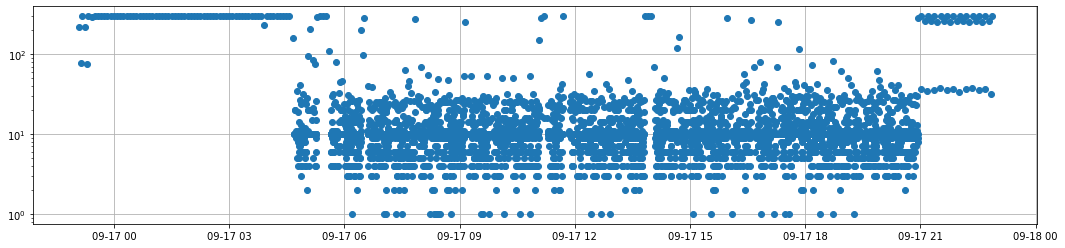

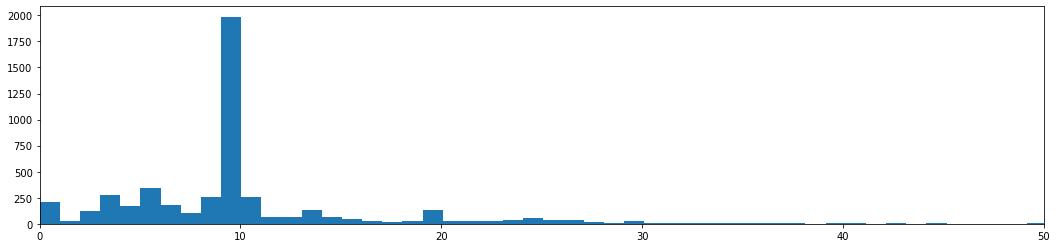

'39'(4266) -> '9'(377)
Max update time 1673


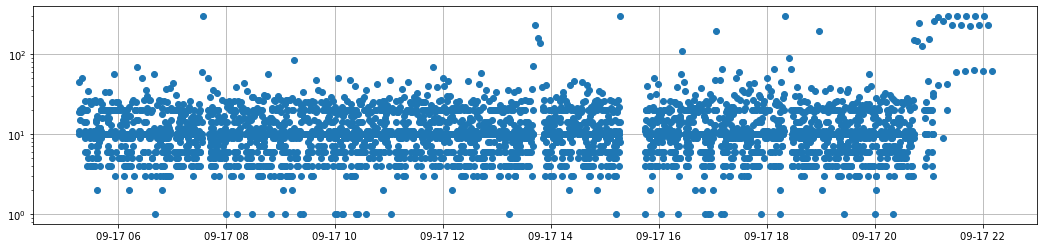

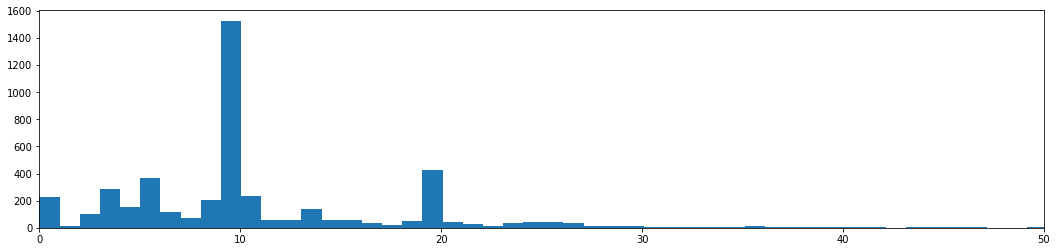

'13'(4348)
Max update time 927


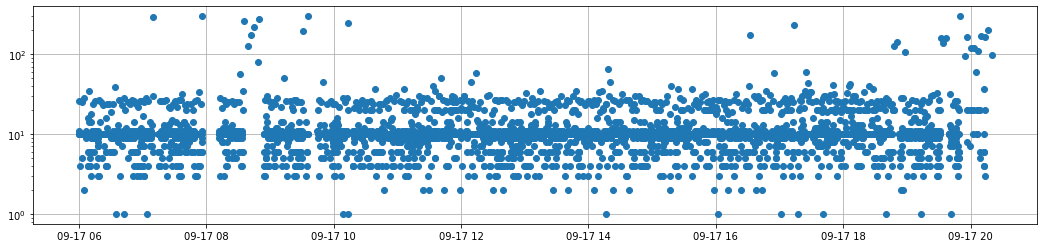

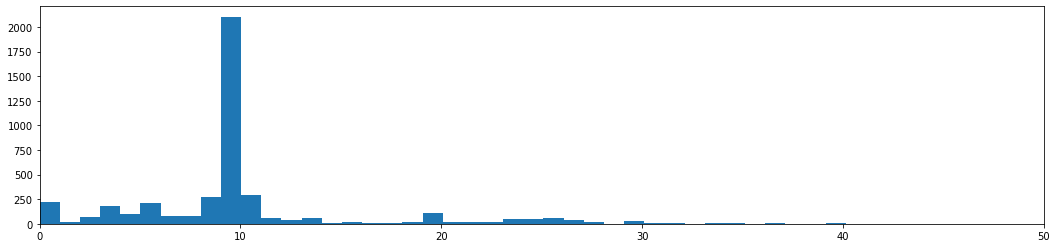

'6'(4192)
Max update time 682


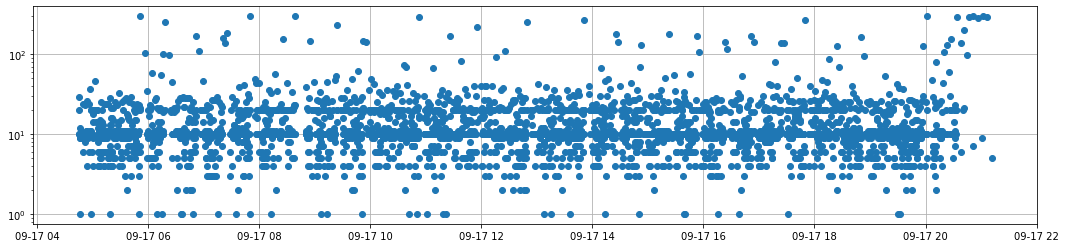

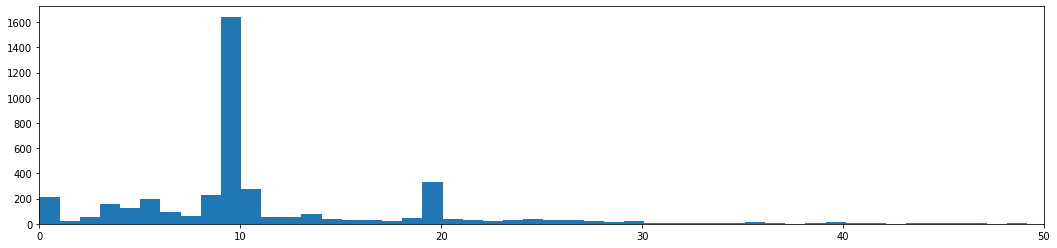

'39'(4027) -> '9A'(151)
Max update time 594


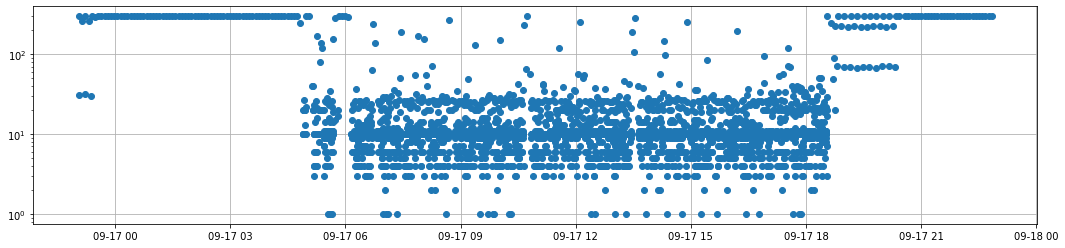

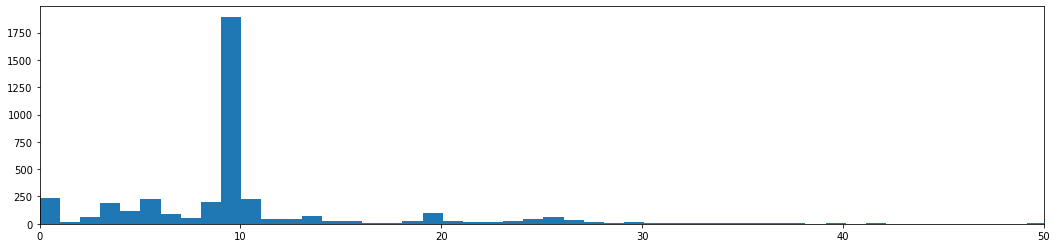

'20'(3649) -> '2A'(401)
Max update time 307


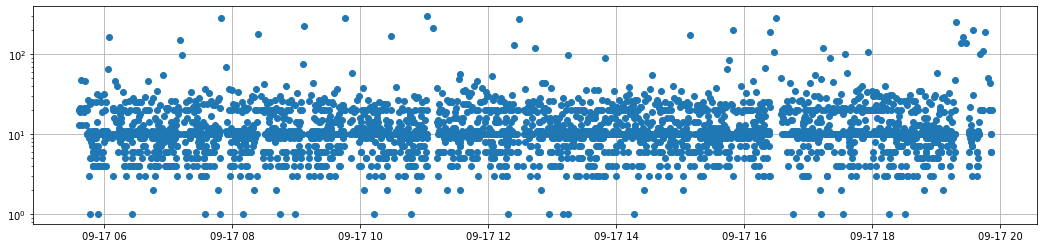

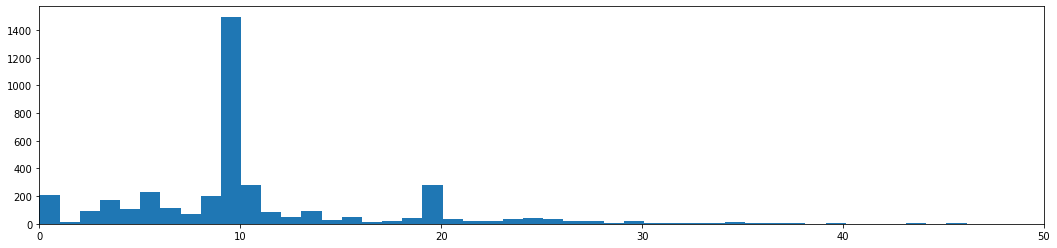

'3/3a'(3542) -> 'T'(488)
Max update time 20902


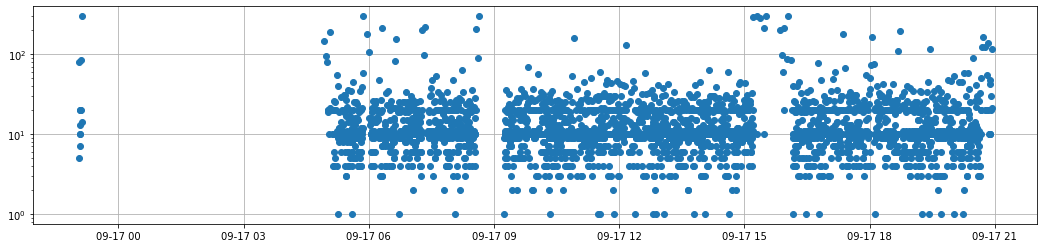

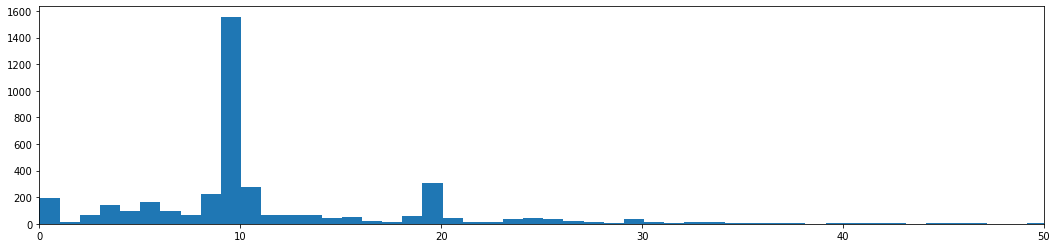

'3/3a'(3391) -> 'T'(575)
Max update time 308


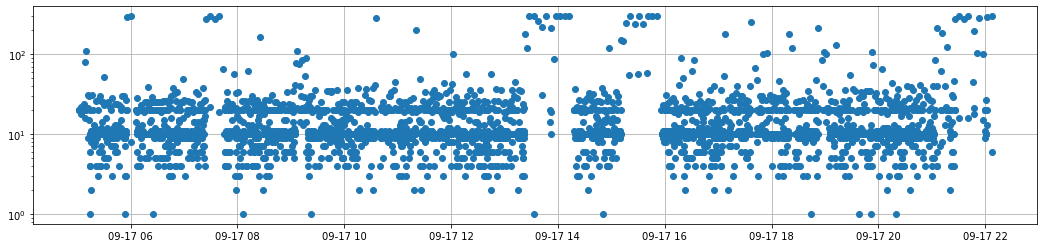

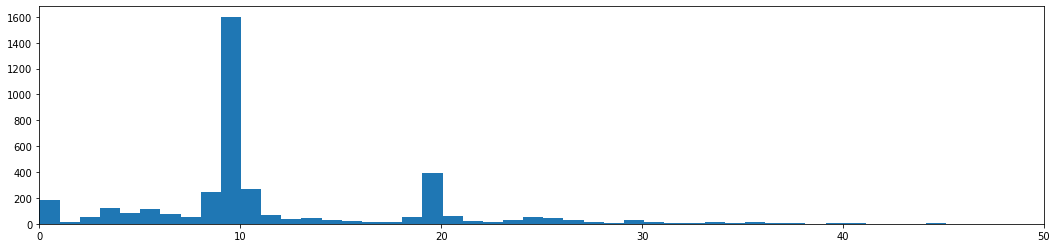

'13'(3954)
Max update time 4195


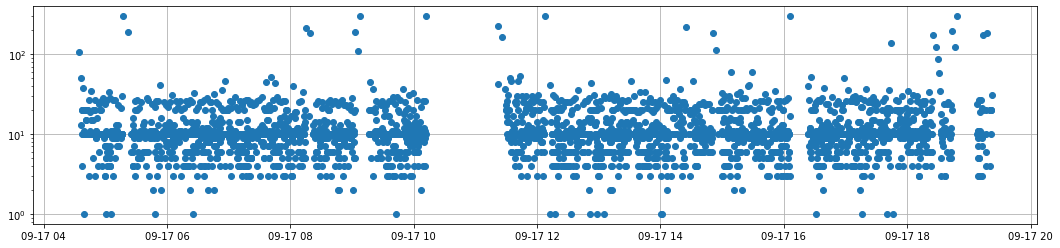

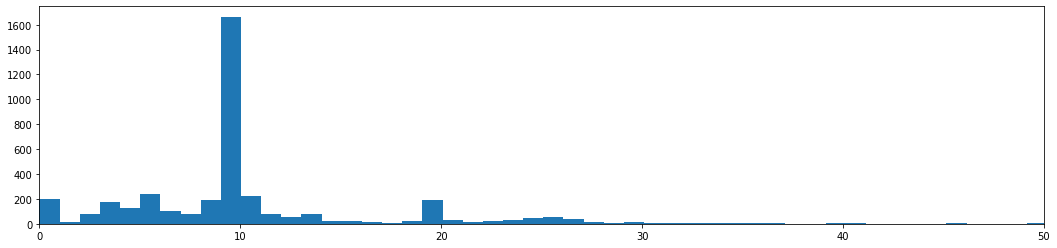

'9A'(3942)
Max update time 307


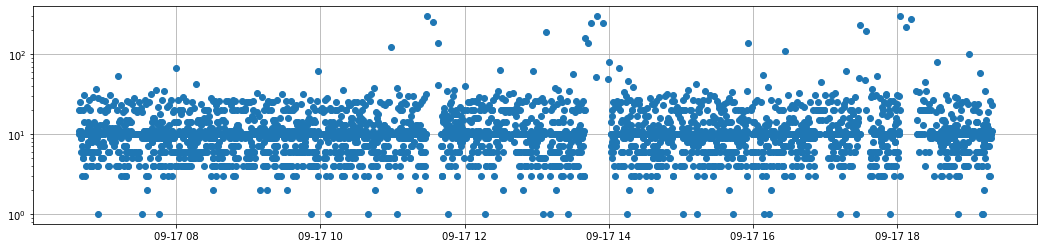

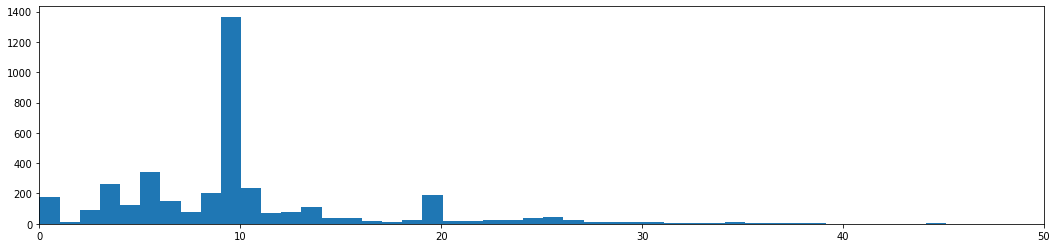

'19'(2461) -> '9A'(1472)
Max update time 65


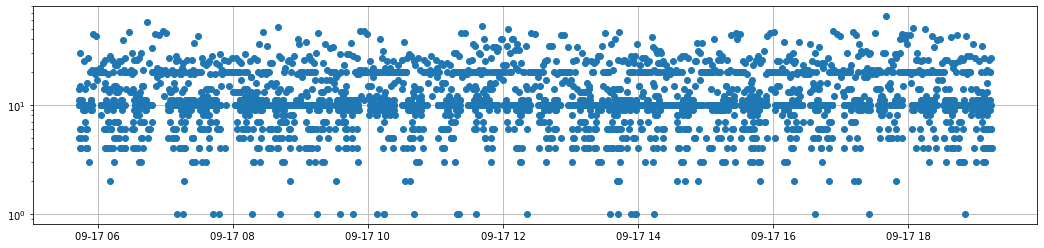

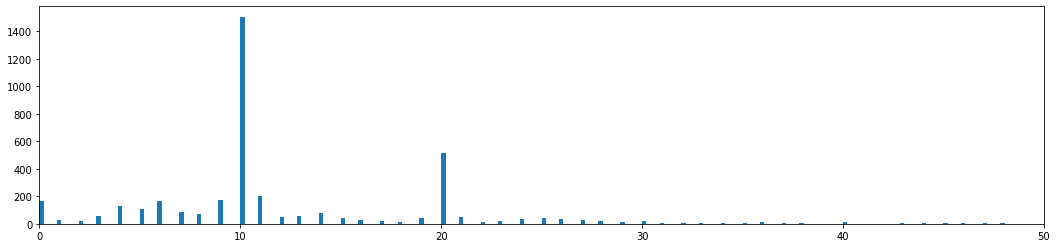

'1T'(3578) -> 'T'(321)
Max update time 312


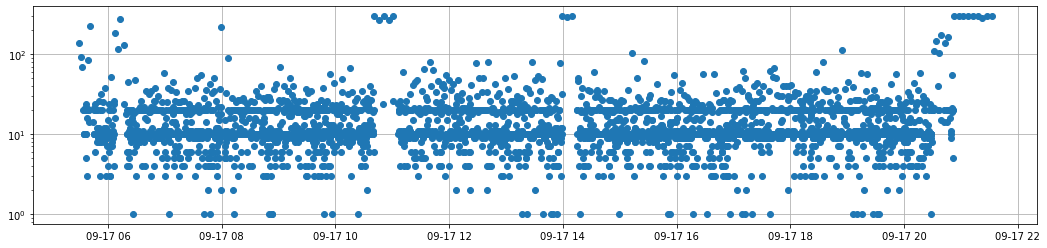

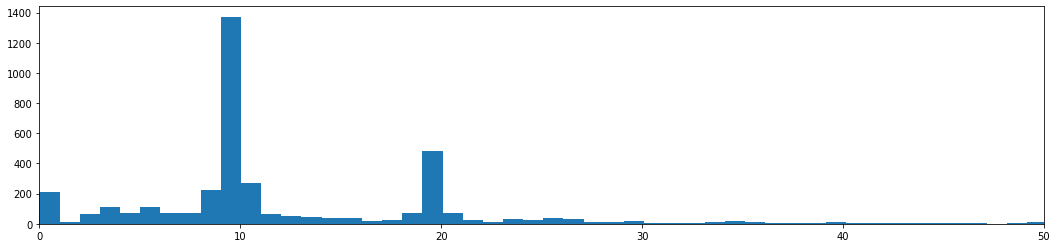

'11'(3892)
Max update time 832


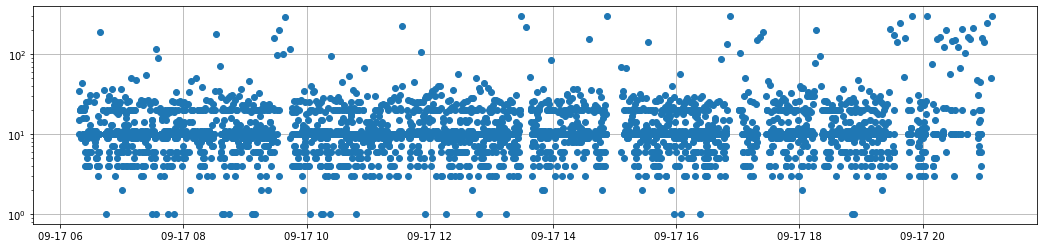

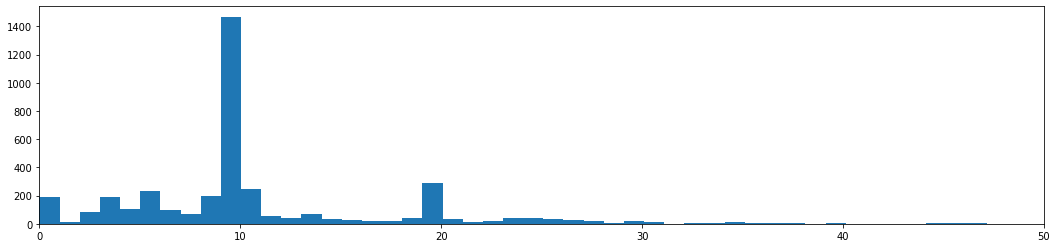

'9A'(3880)
Max update time 740


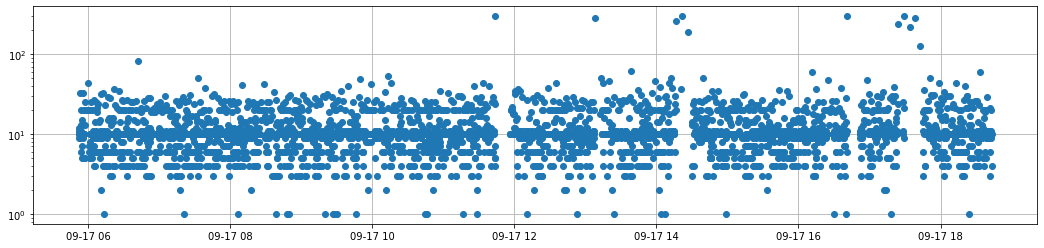

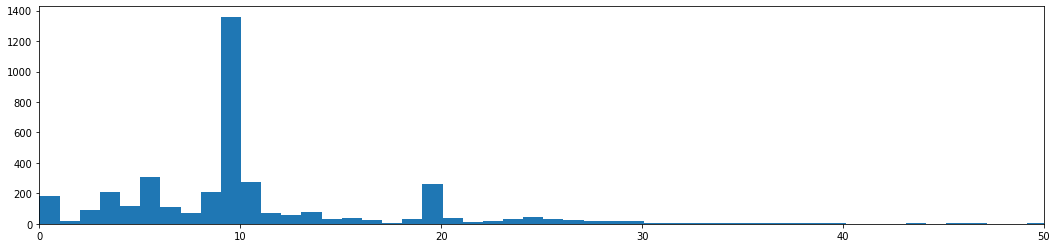

'29'(3879)
Max update time 308


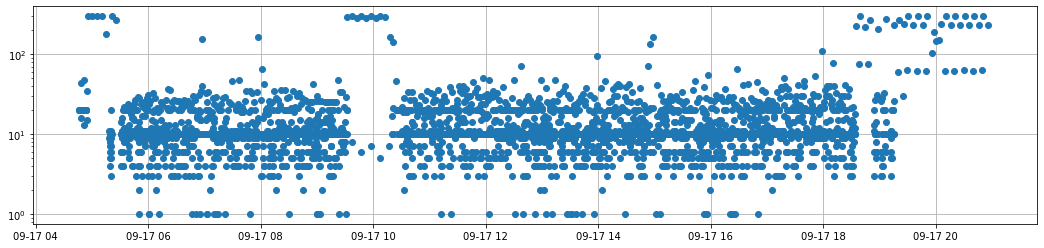

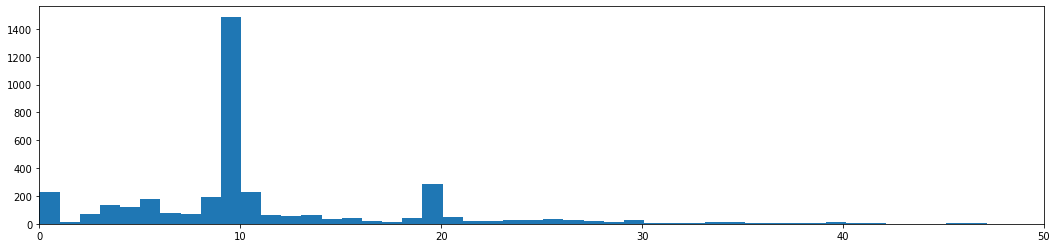

'12'(3732)
Max update time 2653


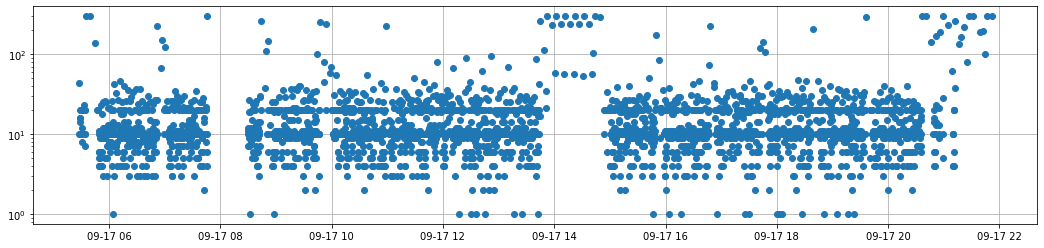

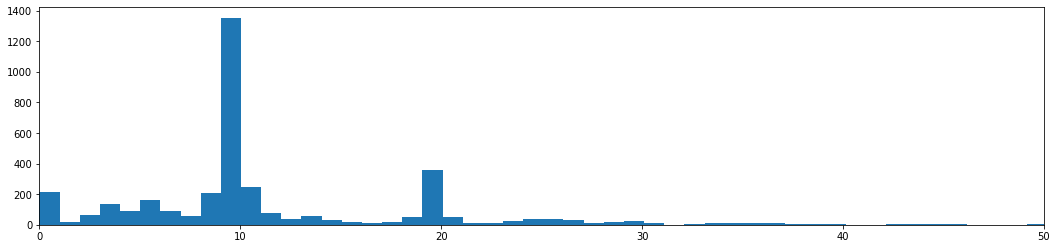

'11/3'(3380) -> 'T'(192) -> '2T'(153)
Max update time 464


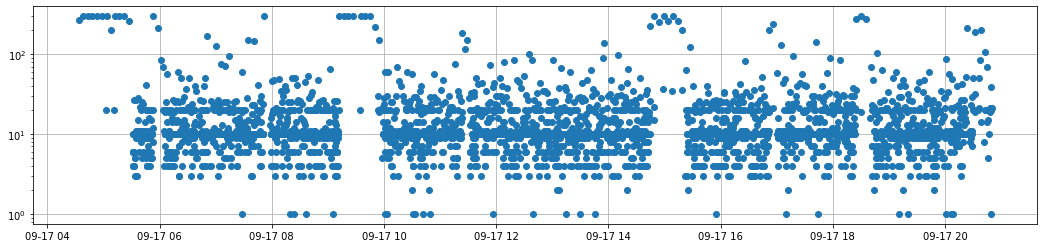

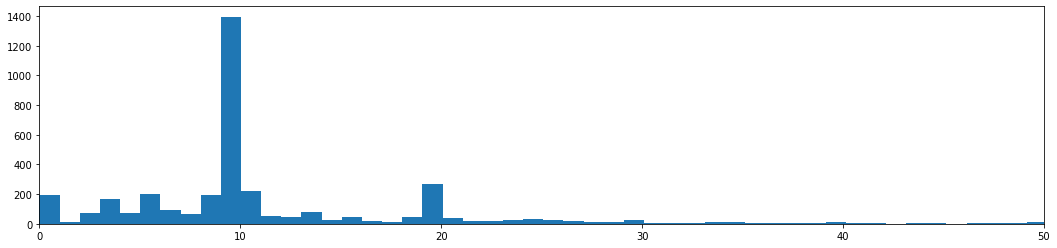

'6'(3698)
Max update time 510


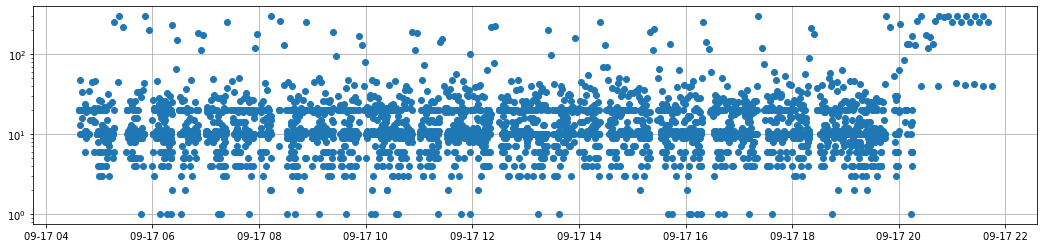

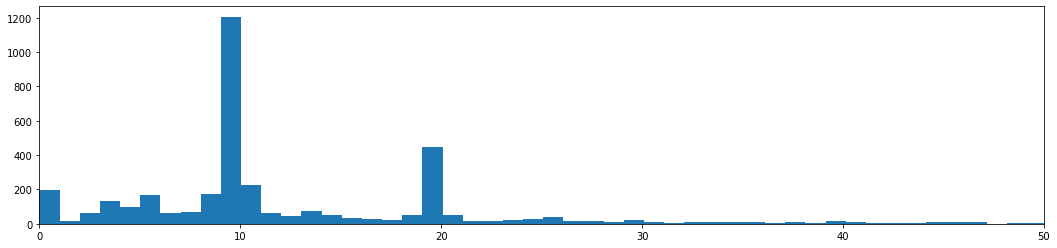

'34'(3632)
Max update time 857


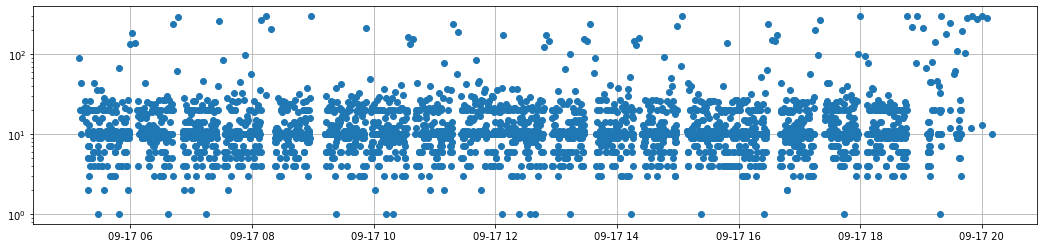

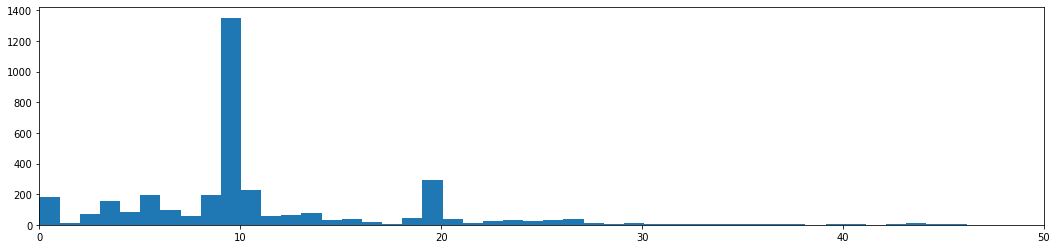

'8T'(3236) -> 'T'(381)
Max update time 537


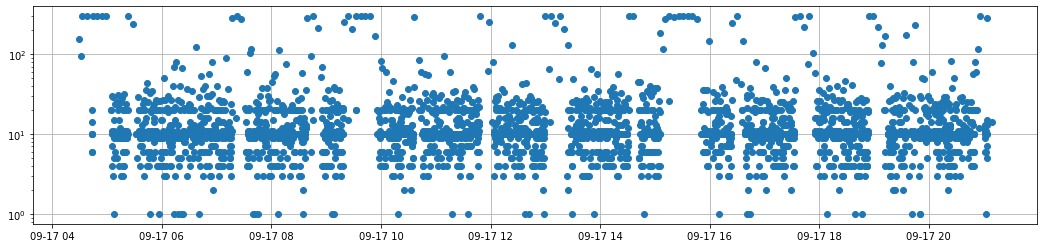

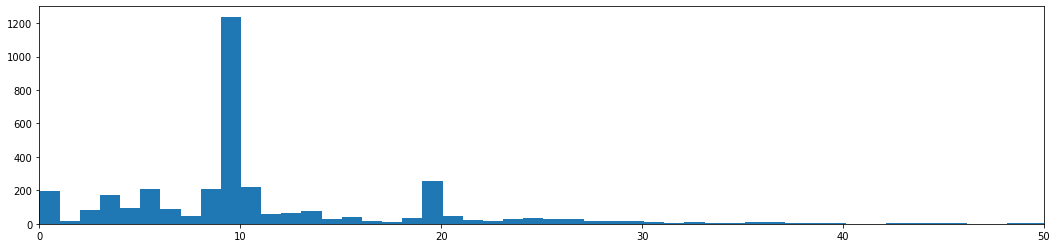

'2T'(3328) -> 'T'(249)
Max update time 22759


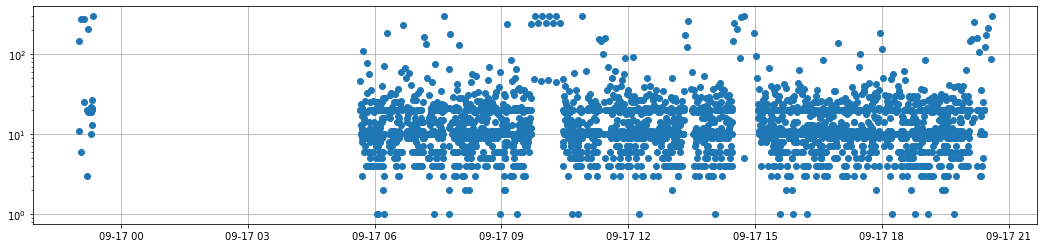

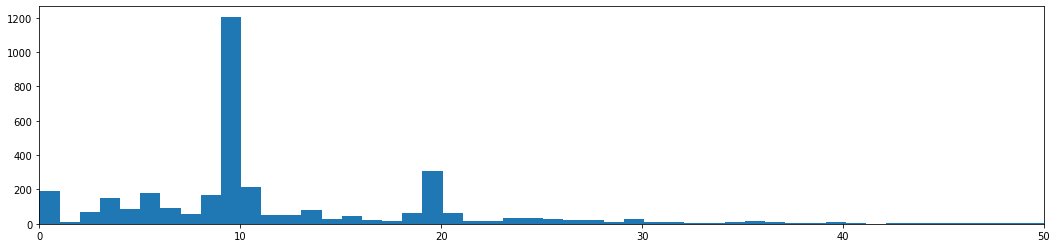

'5T'(2976) -> 'T'(557)
Max update time 307


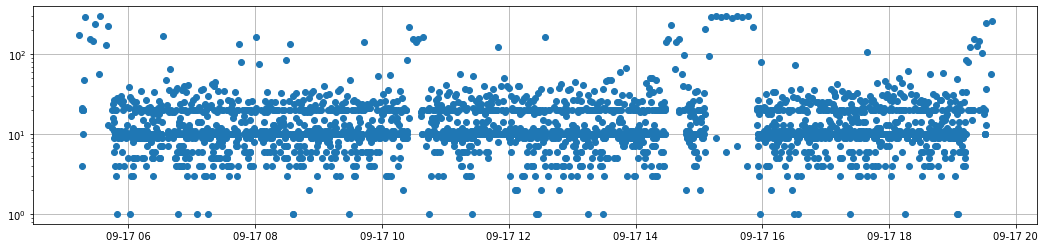

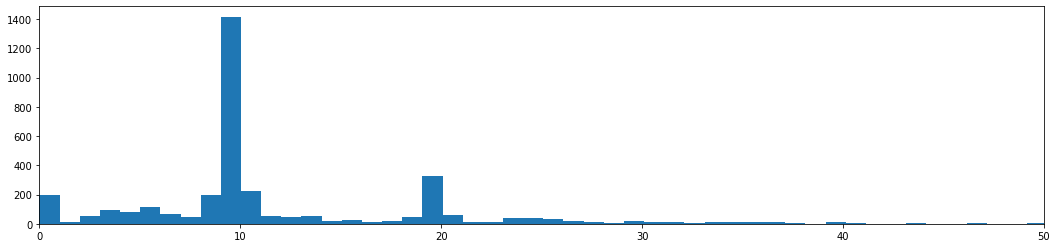

'20'(3278) -> '2'(247)
Max update time 693


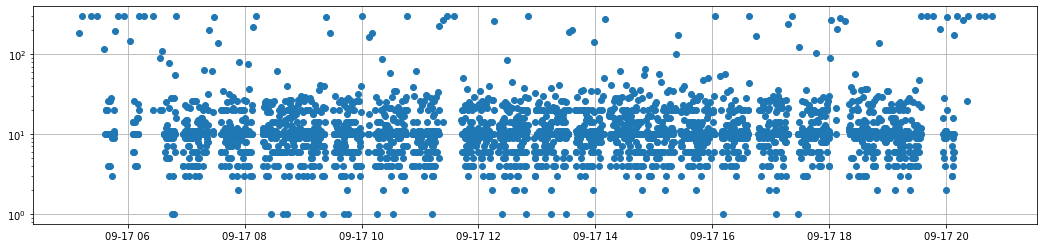

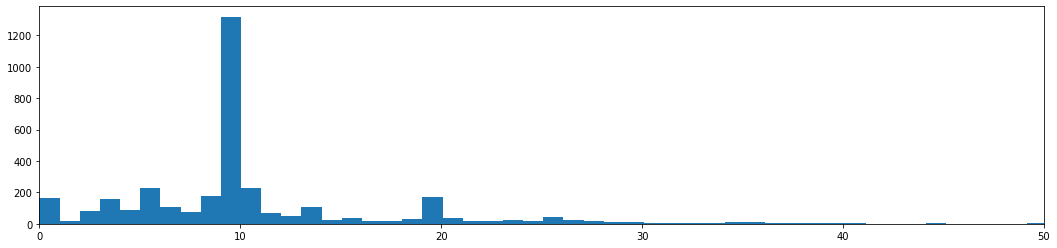

'3/3a'(3132) -> 'T'(366)
Max update time 504


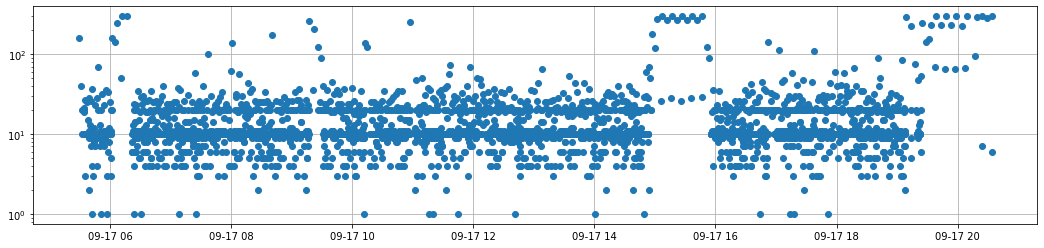

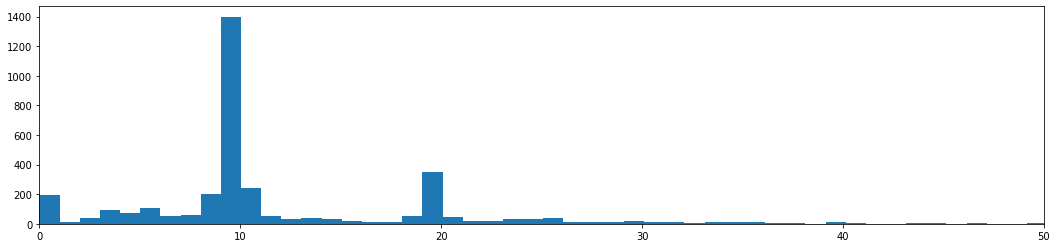

'13'(3485)
Max update time 1013


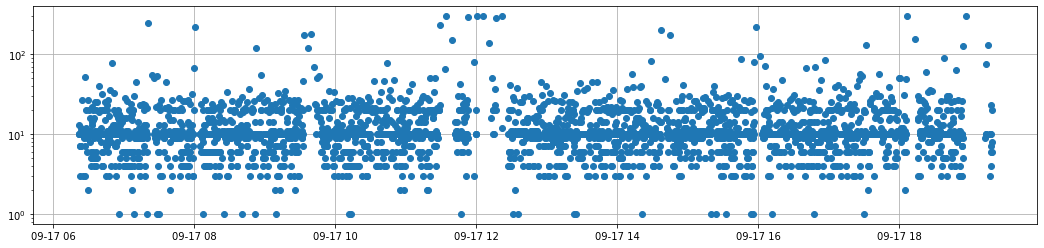

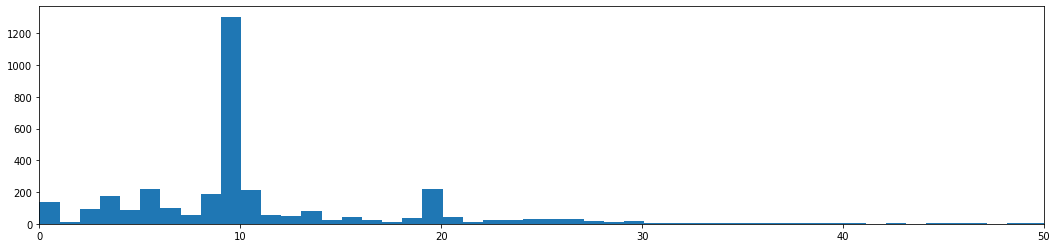

'6/6a'(3047) -> 'T'(424)
Max update time 433


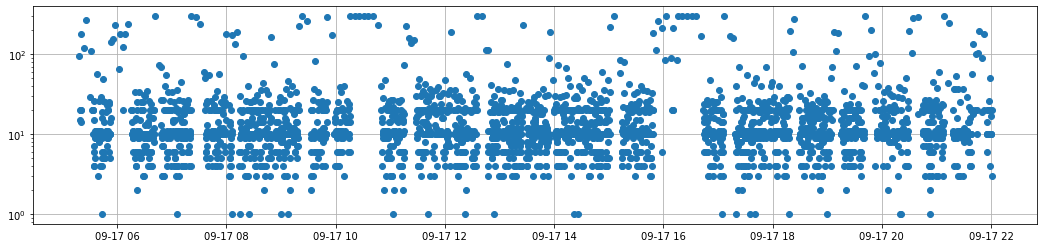

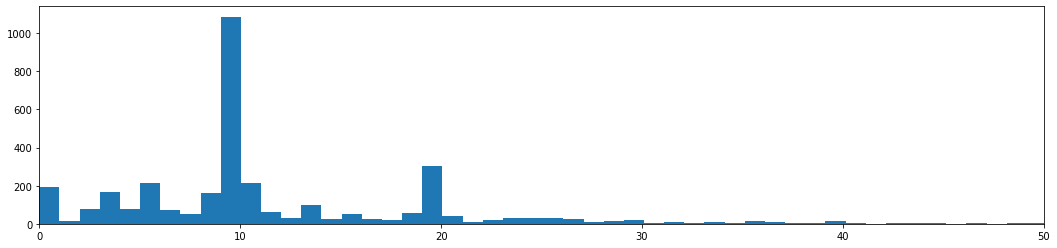

'12'(3471)
Max update time 307


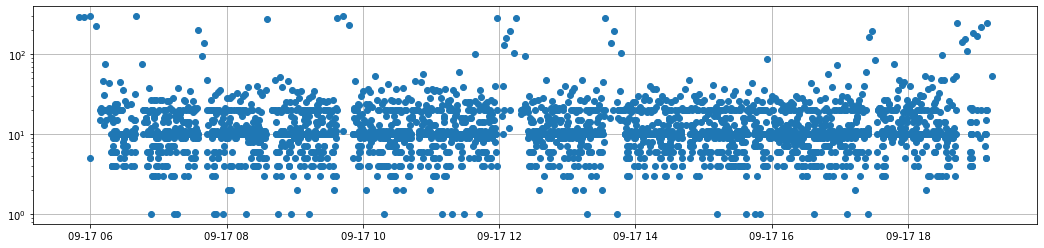

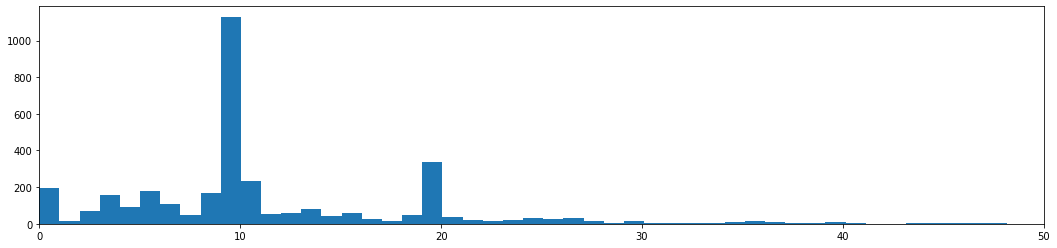

'8T'(2935) -> 'T'(437)
Max update time 867


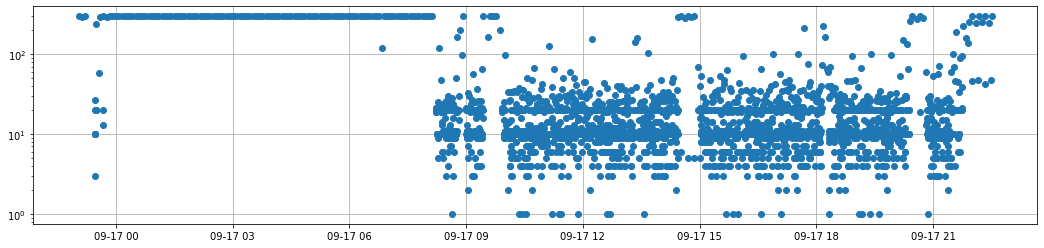

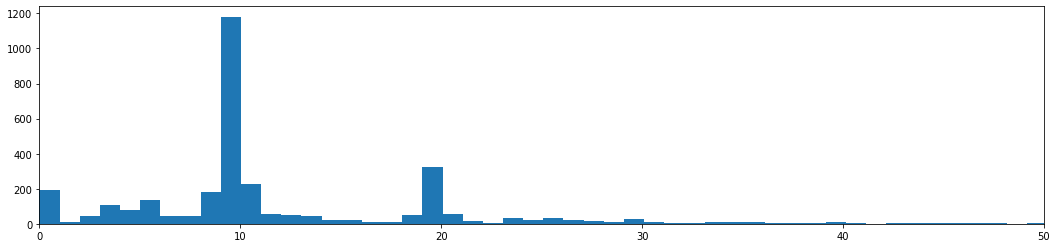

'6/6a'(2924) -> 'T'(404)
Max update time 362


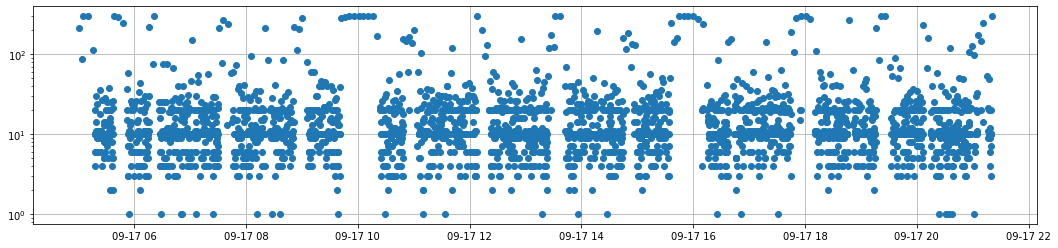

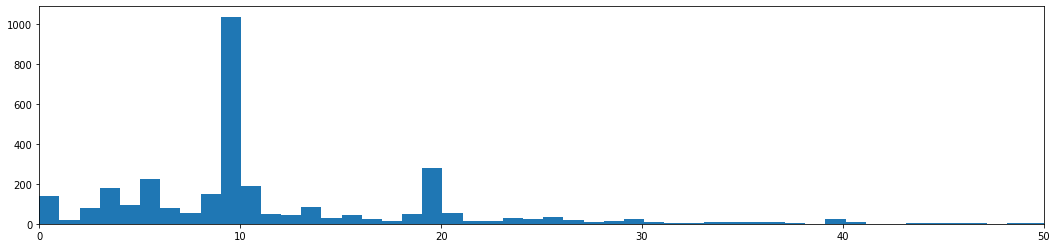

'34'(3293)
Max update time 828


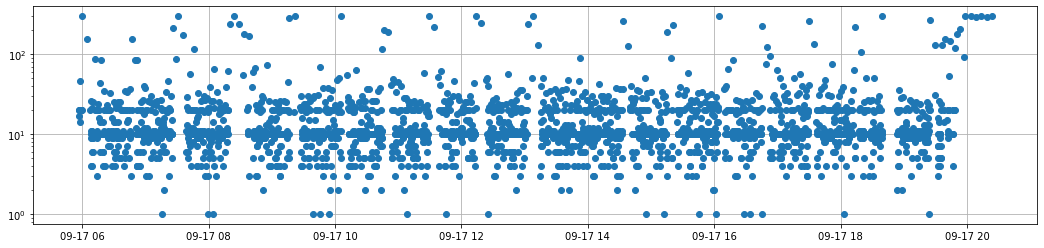

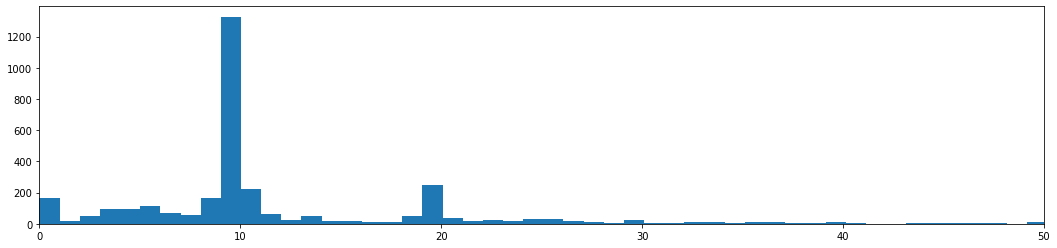

'5'(3292)
Max update time 1862


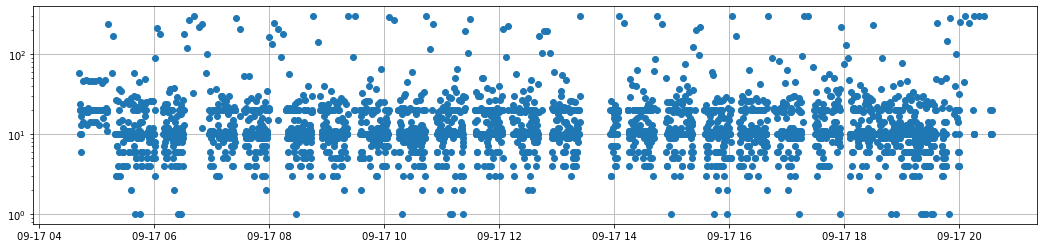

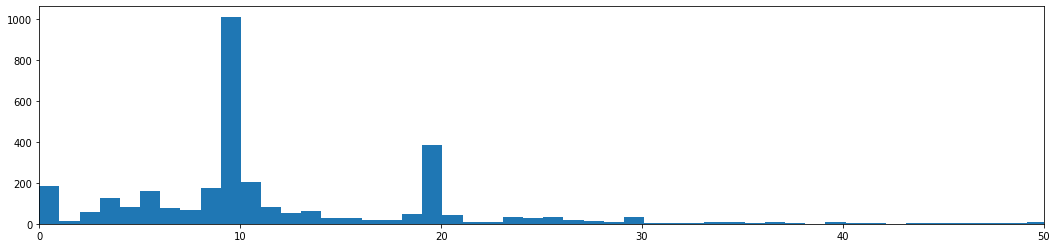

'5T'(2847) -> 'T'(411)
Max update time 603


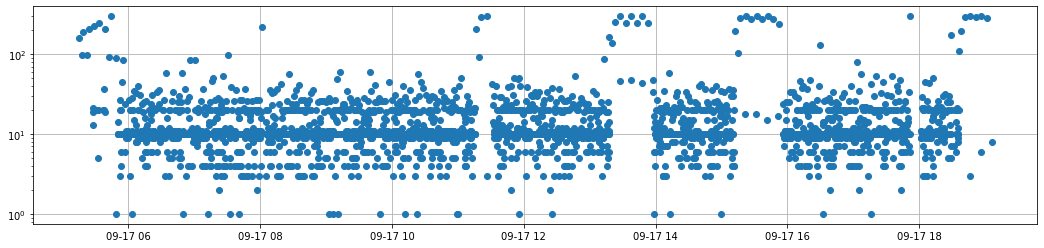

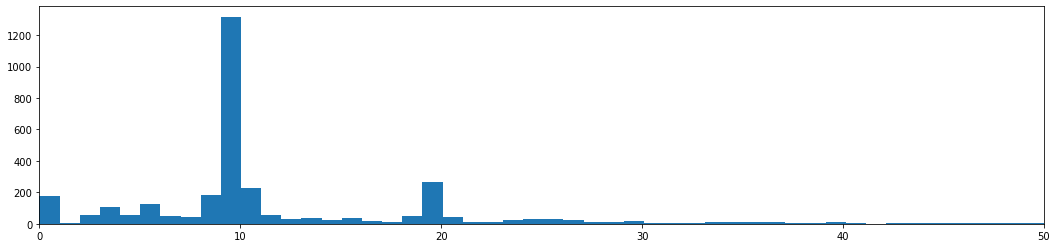

'29'(2904) -> '20'(135) -> '9'(125) -> '2A'(76)
Max update time 950


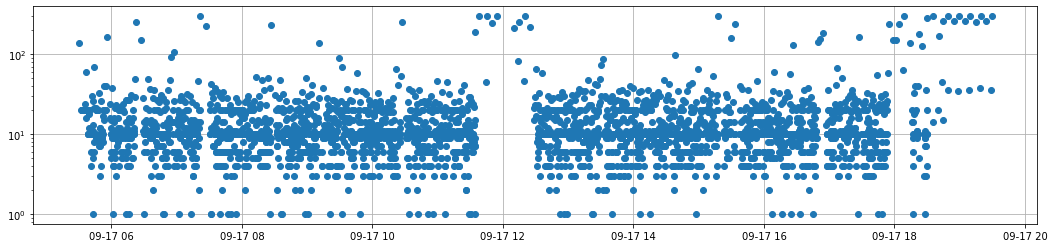

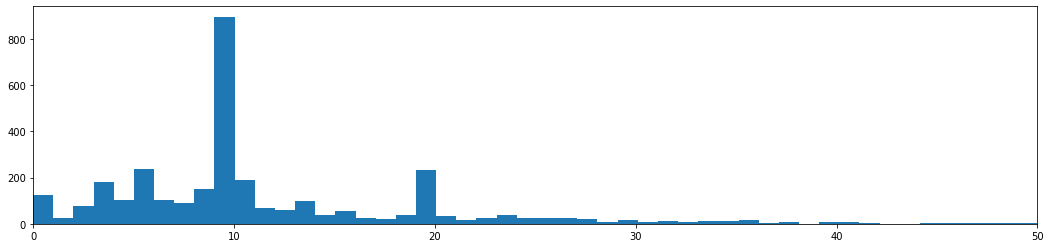

'25'(3219)
Max update time 308


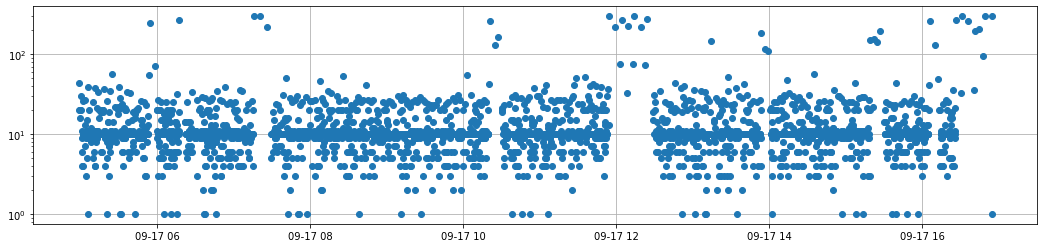

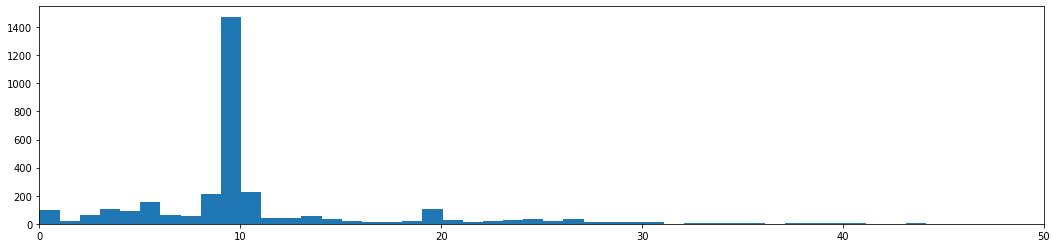

'2T'(2963) -> 'T'(234)
Max update time 360


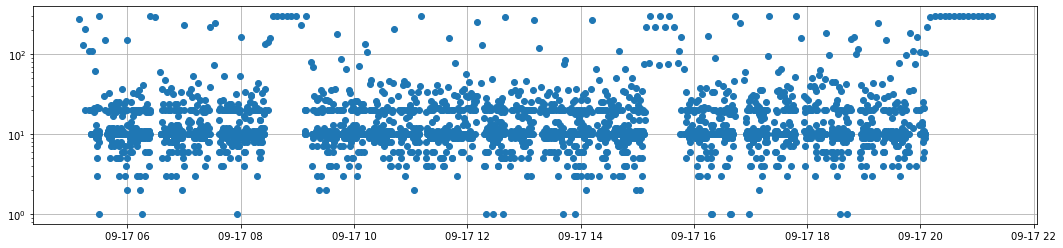

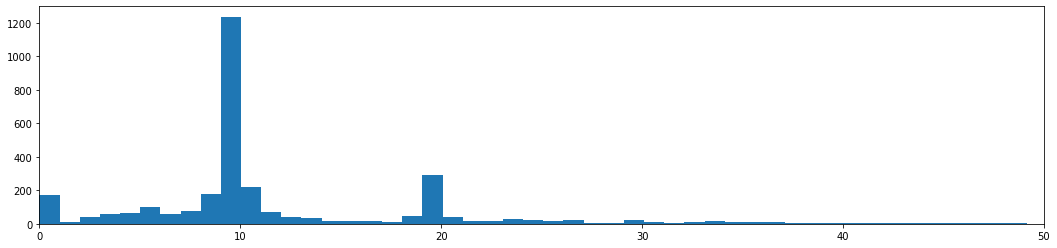

'5'(3142)
Max update time 394


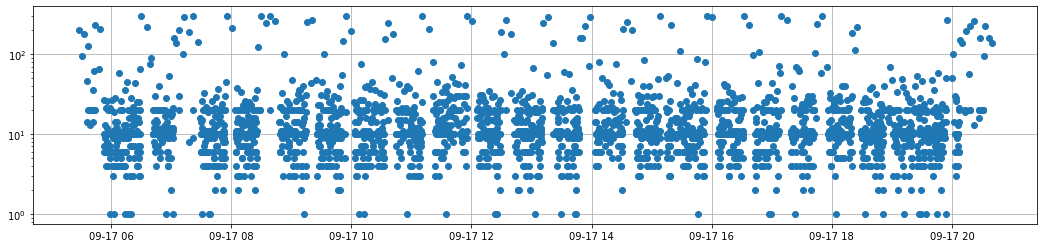

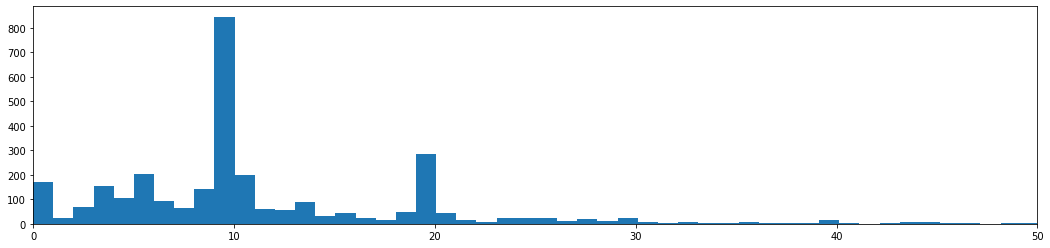

'4'(3093)
Max update time 474


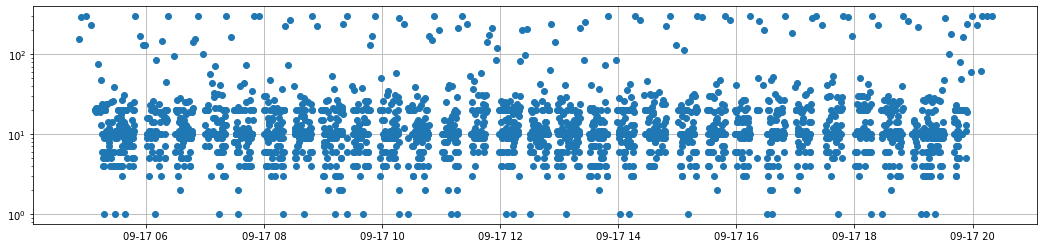

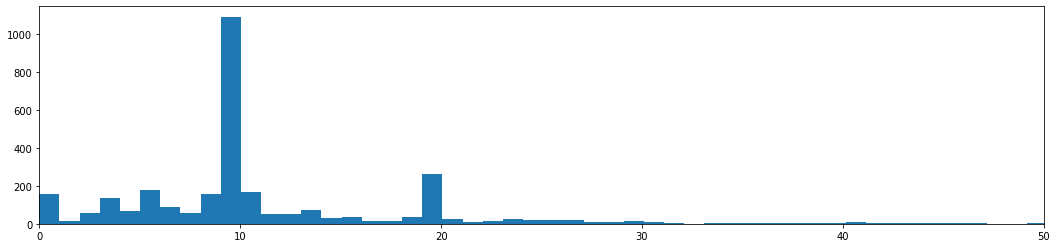

'6/6a'(2736) -> 'T'(294)
Max update time 308


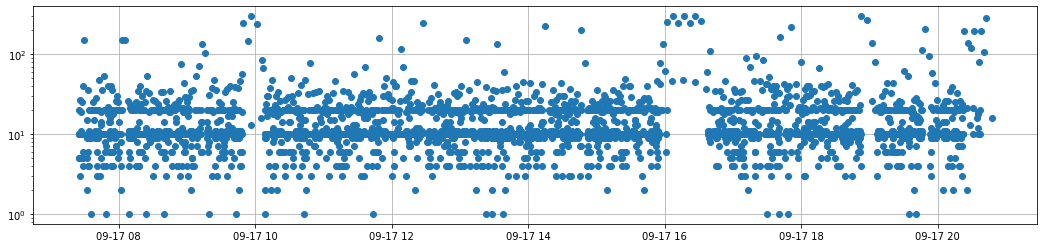

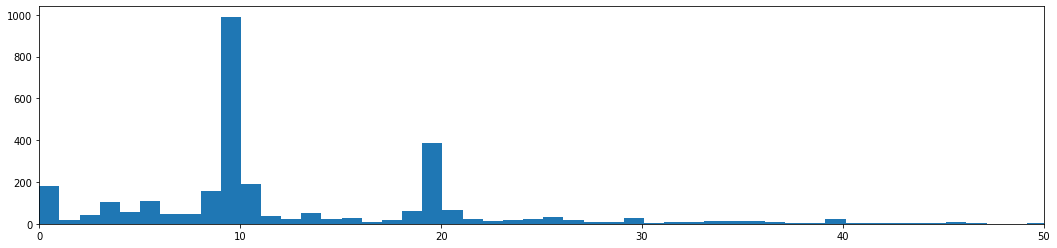

'34'(2853) -> 'A'(153)
Max update time 2134


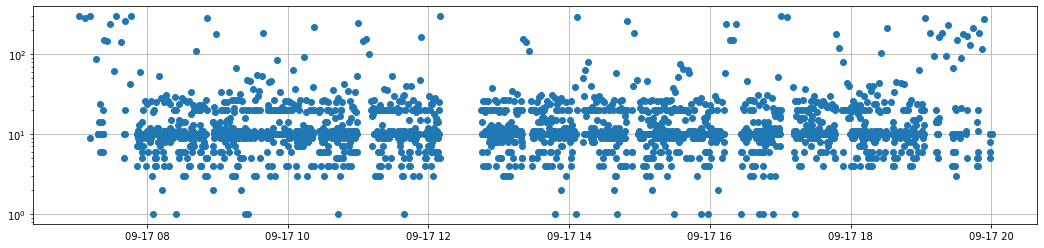

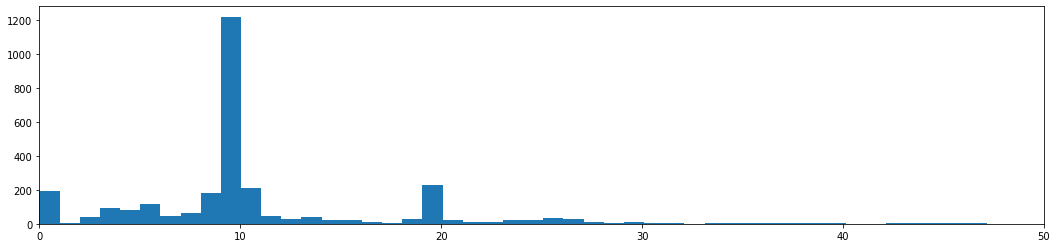

'5'(2989)
Max update time 600


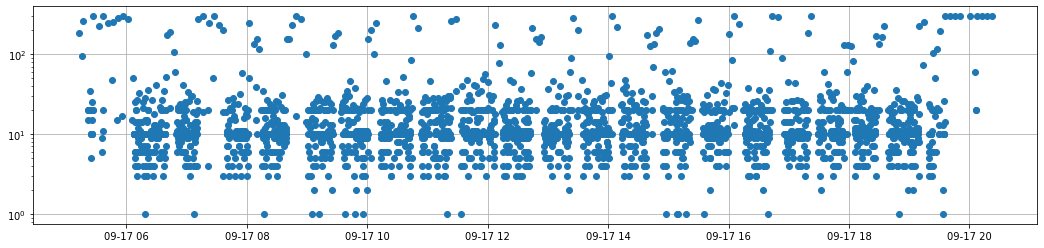

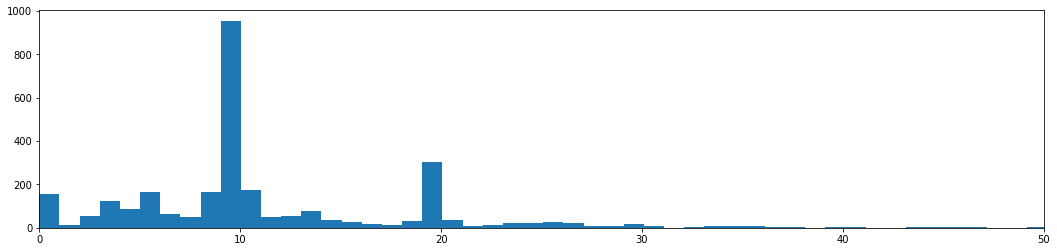

'5'(2972)
Max update time 392


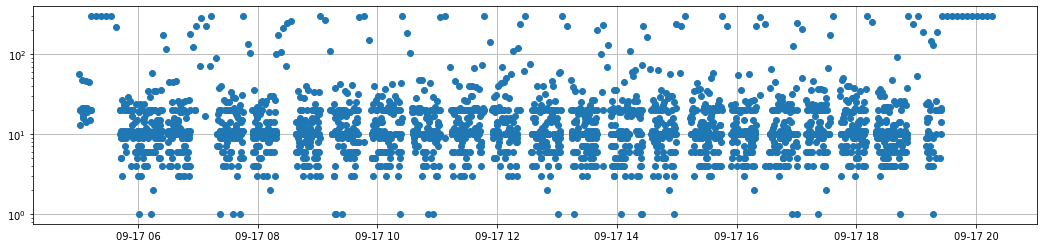

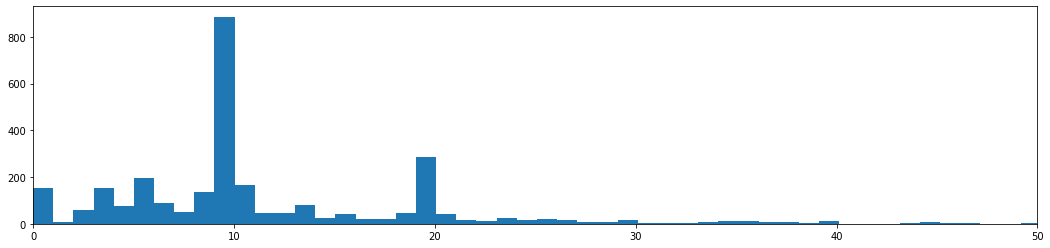

'27'(2942)
Max update time 692


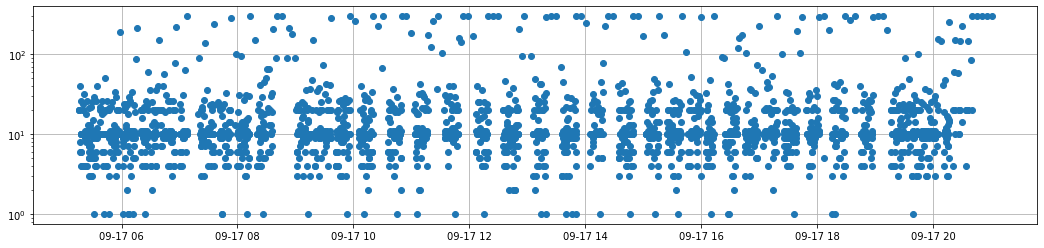

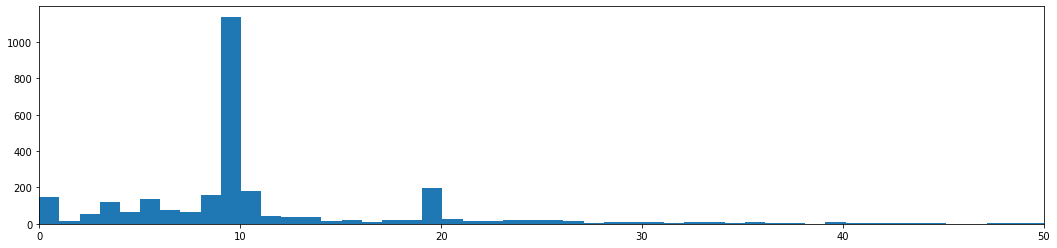

'20'(2009) -> '29'(872)
Max update time 444


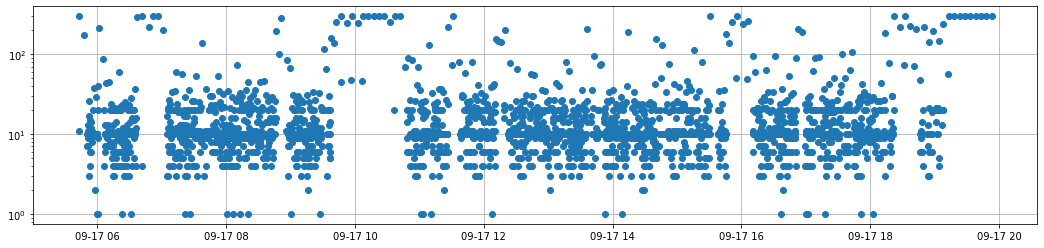

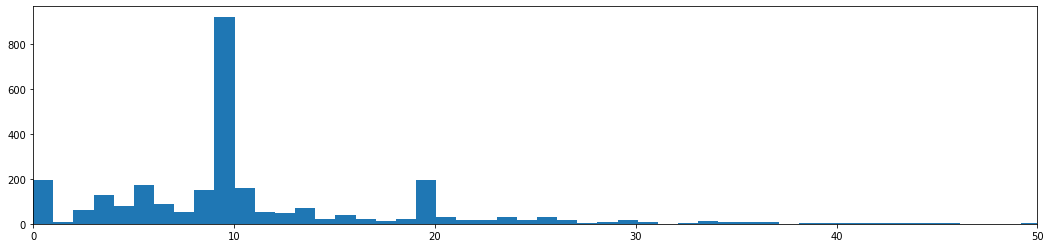

'5'(2840)
Max update time 306


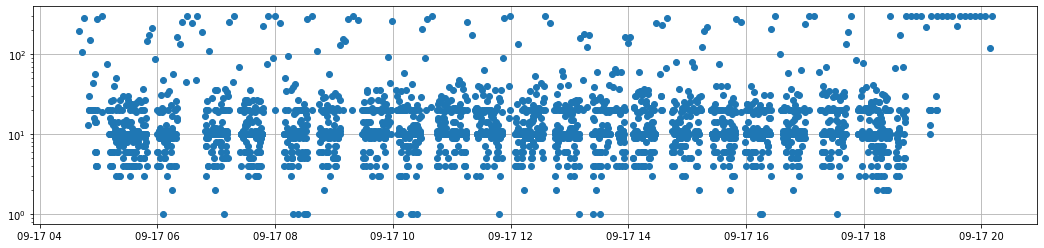

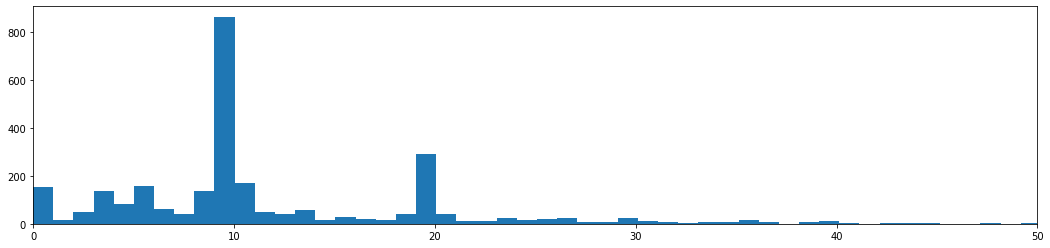

'1'(2772)
Max update time 6452


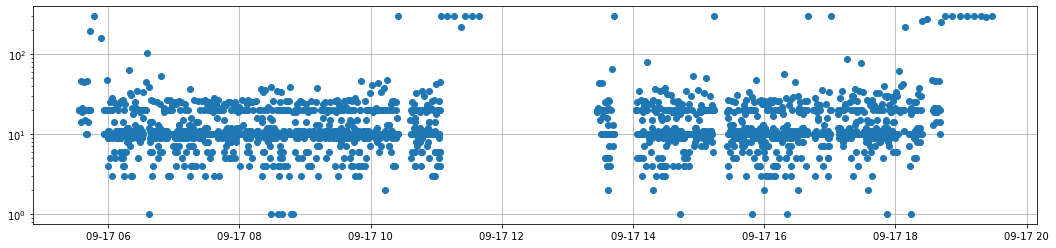

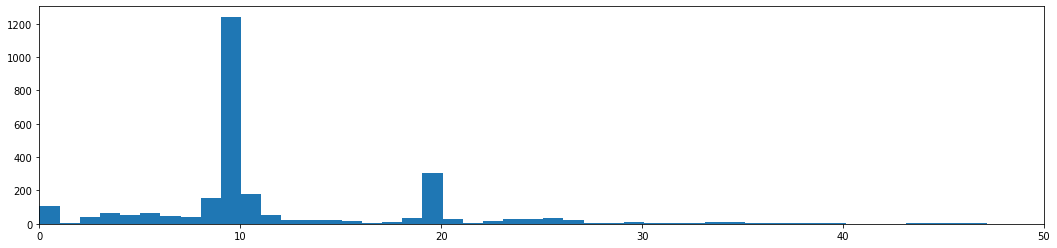

'10'(2757)
Max update time 601


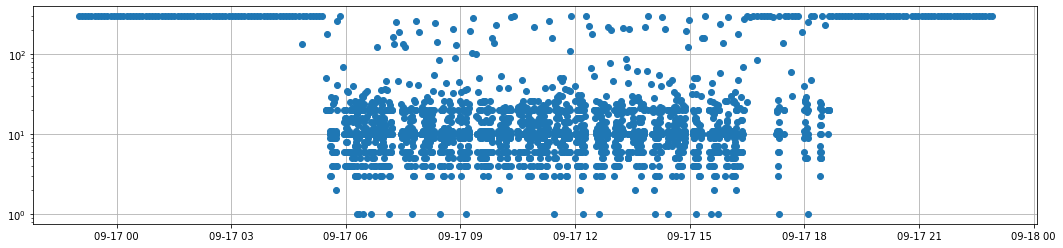

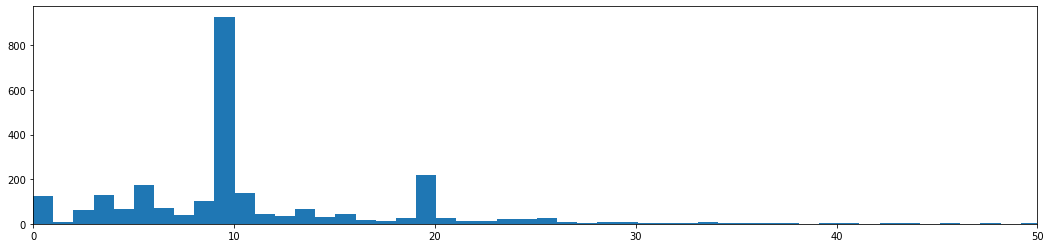

'10'(2742)
Max update time 601


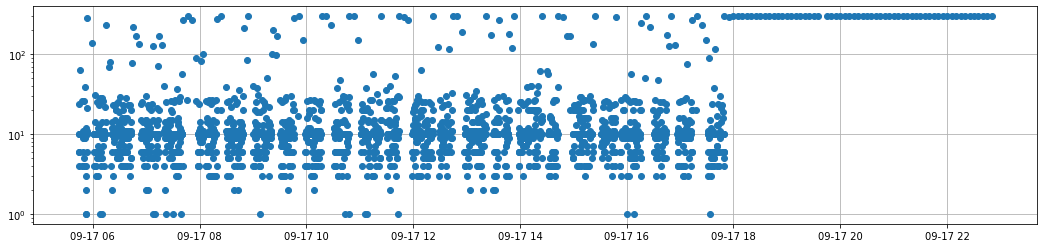

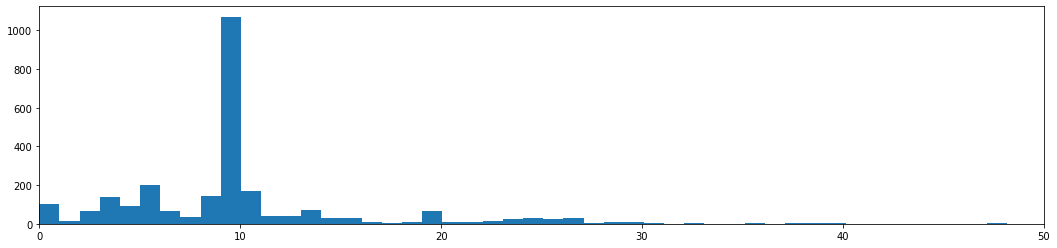

'5'(2655)
Max update time 674


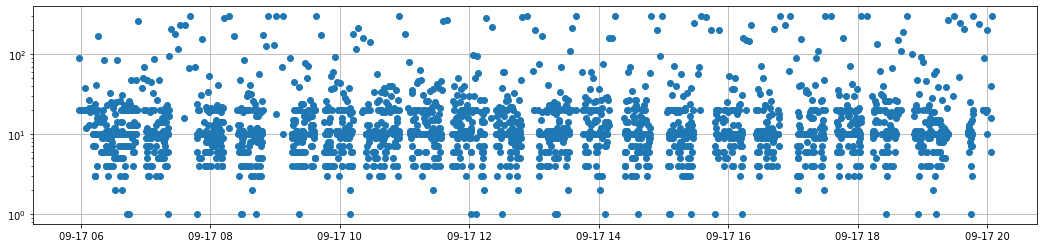

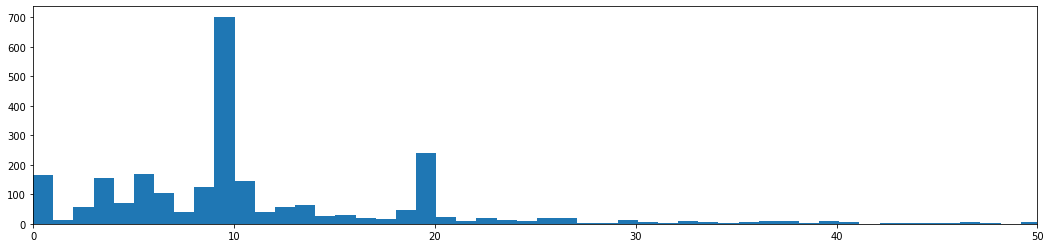

'1'(1920) -> '38'(732)
Max update time 5521


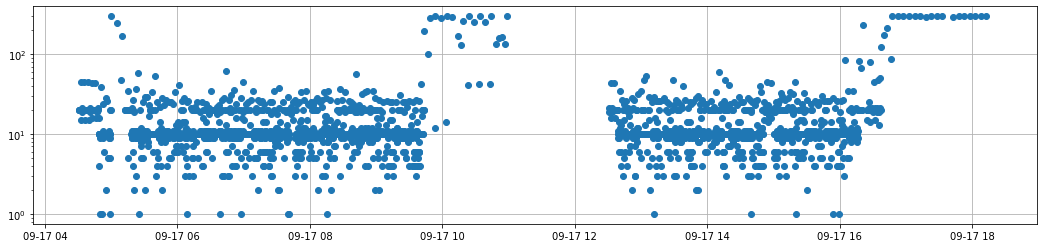

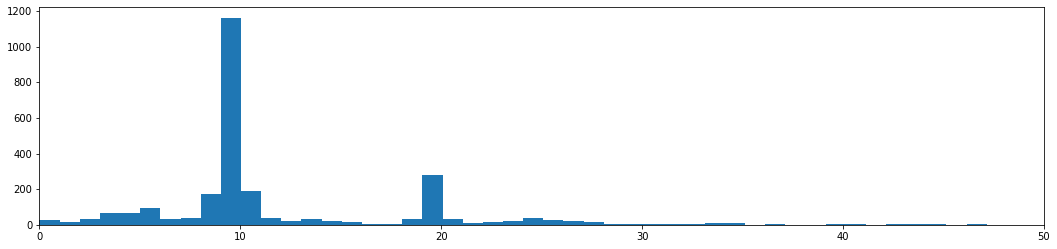

'5'(2340)
Max update time 353


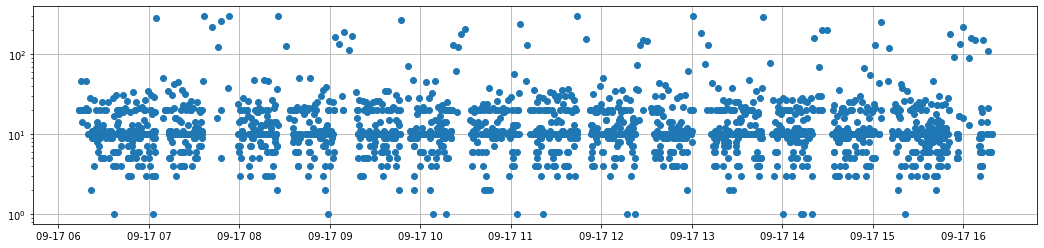

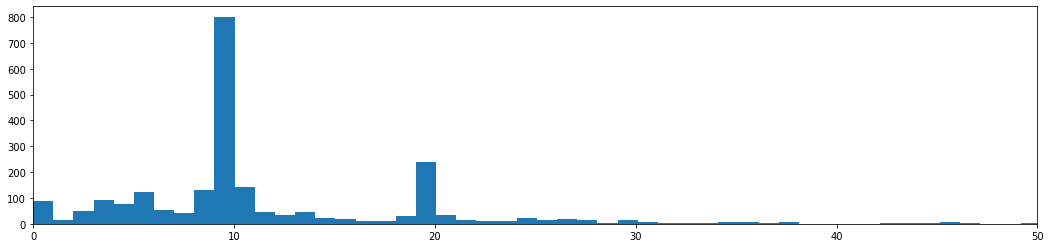

'6/6a'(1735) -> 'T'(553)
Max update time 307


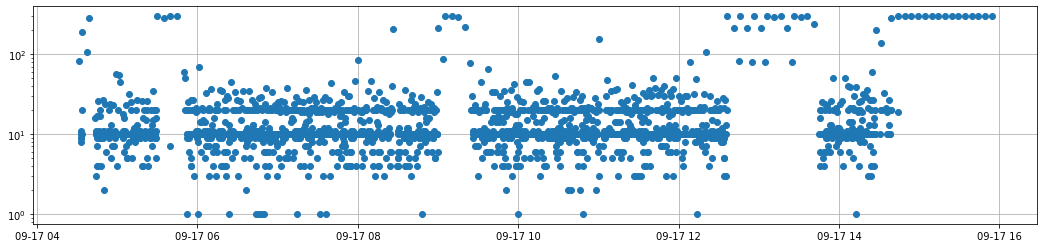

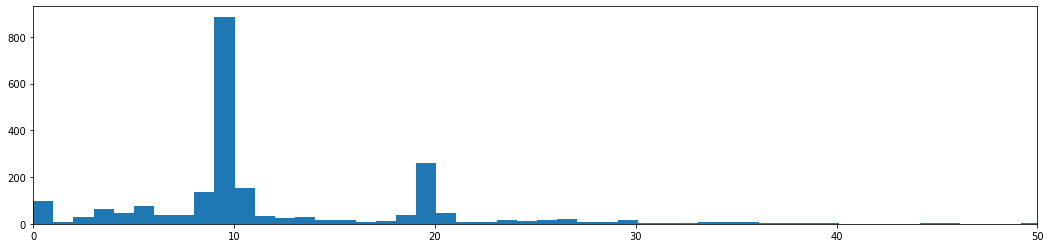

'1'(1715) -> '23'(511)
Max update time 898


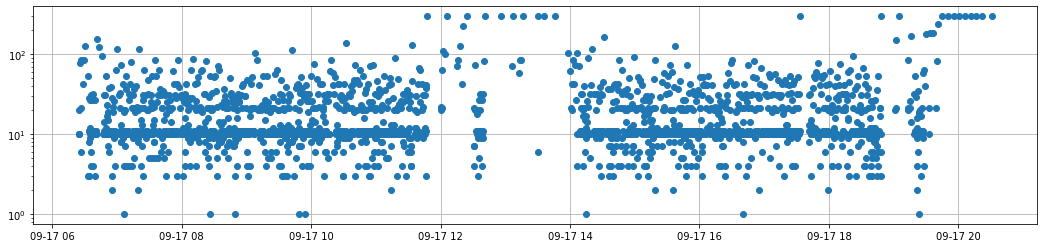

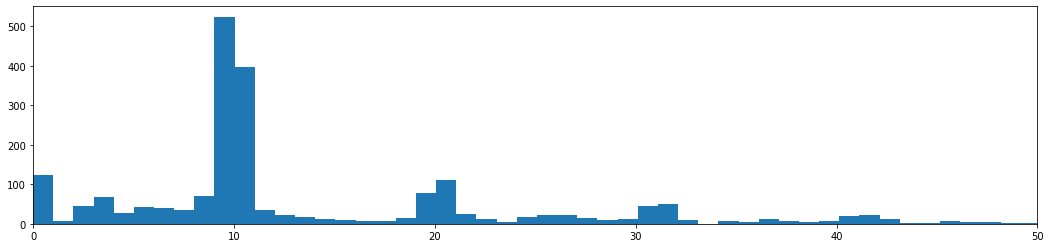

'8T'(2206)
Max update time 21811


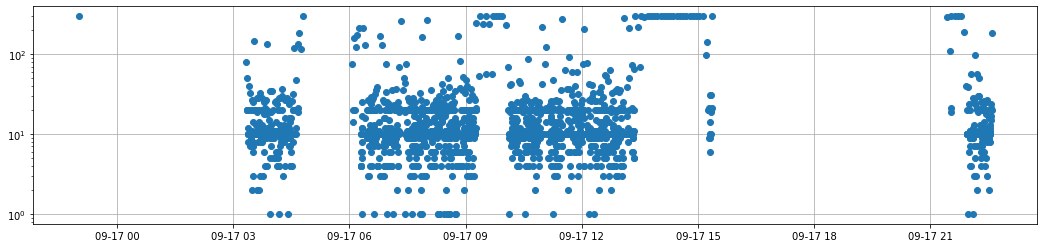

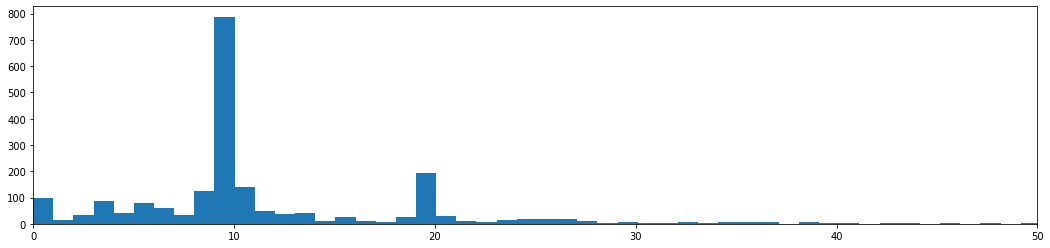

'4'(2021) -> '6'(136)
Max update time 407


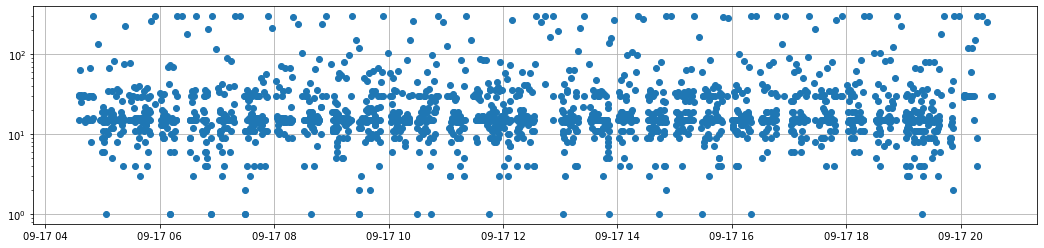

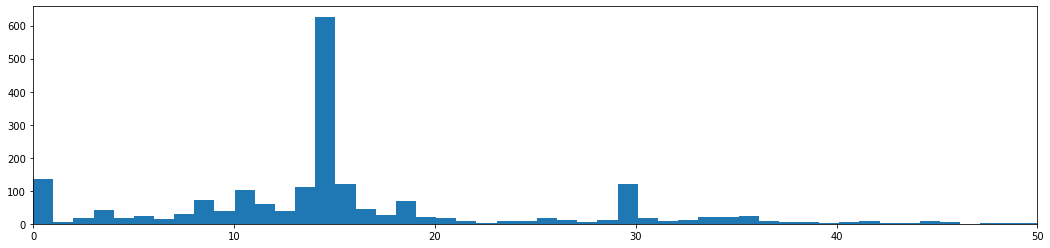

'23'(1971)
Max update time 6225


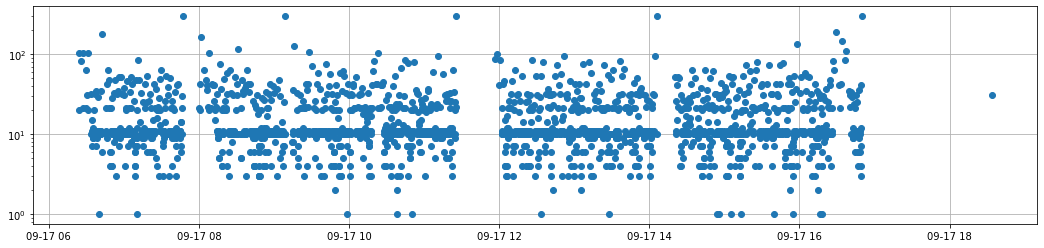

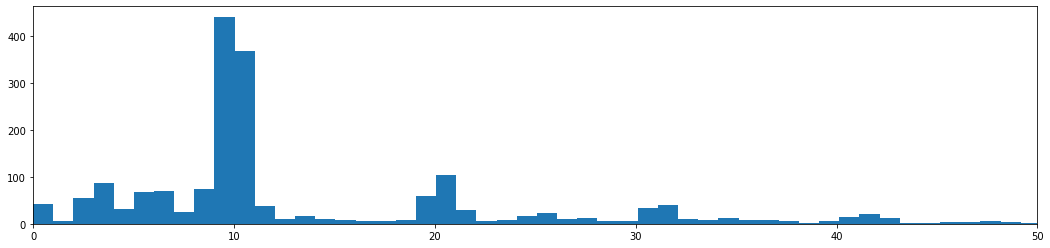

'6/6a'(1455) -> 'T'(467)
Max update time 601


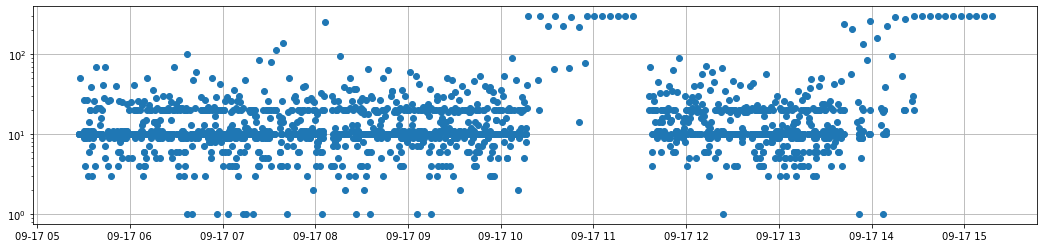

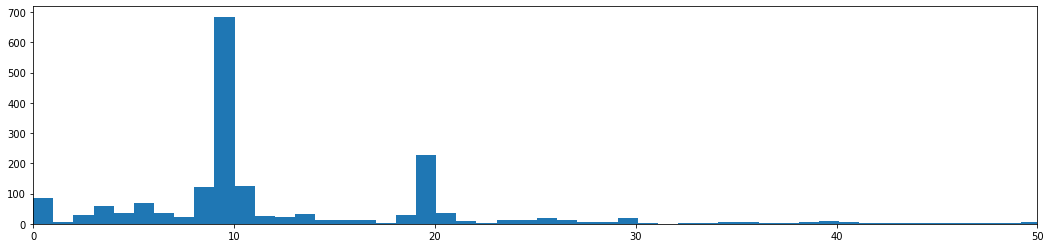

'10A'(1801)
Max update time 3444


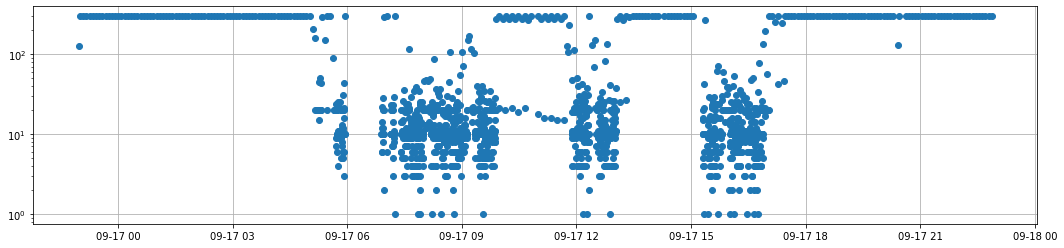

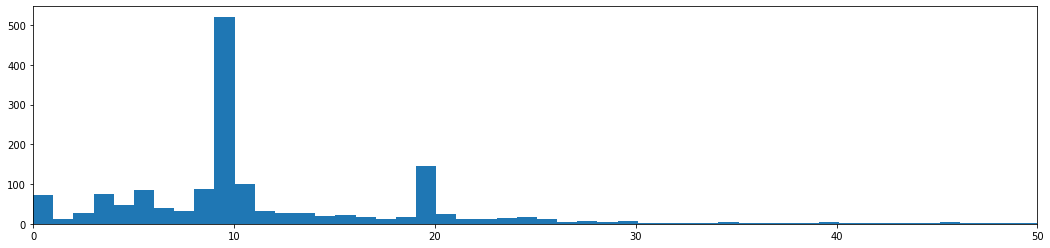

'1A'(1666)
Max update time 2536


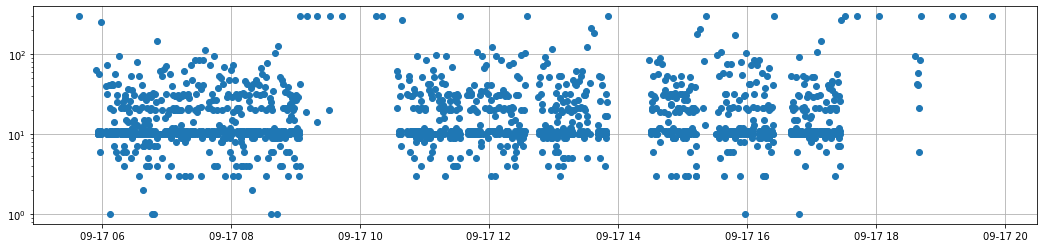

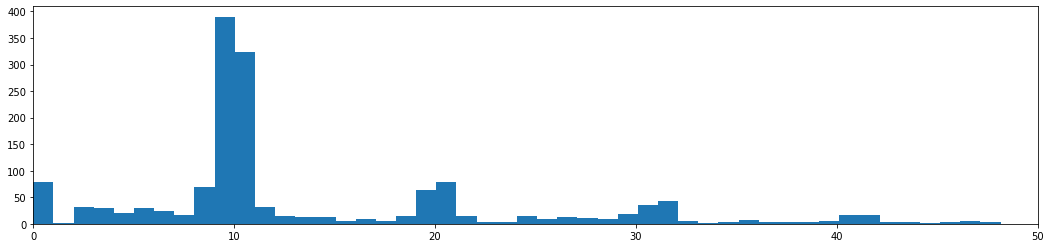

'11'(1647)
Max update time 8636


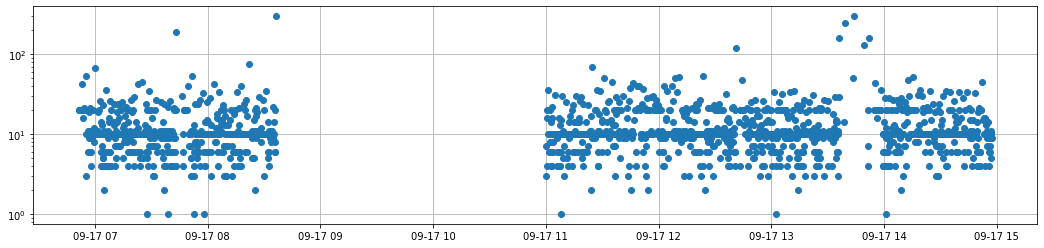

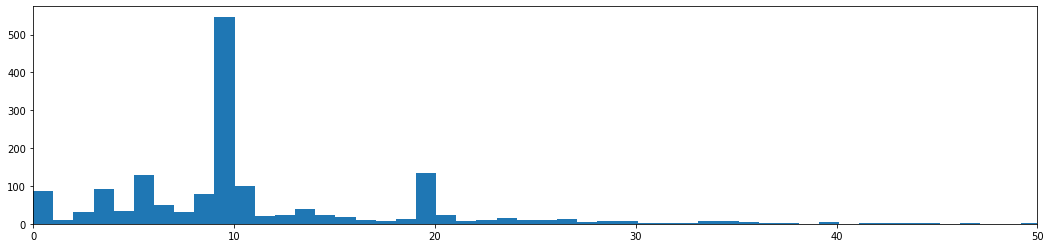

'2A'(1520)
Max update time 308


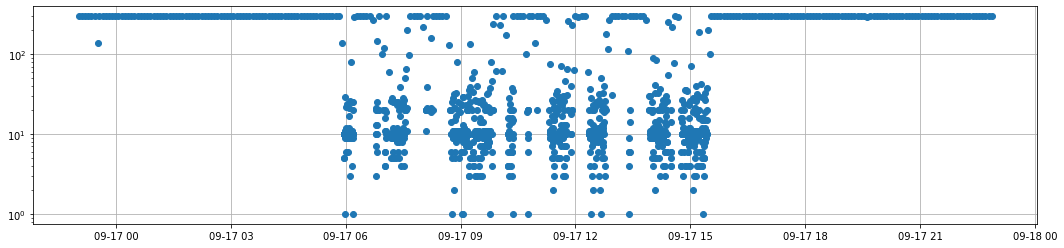

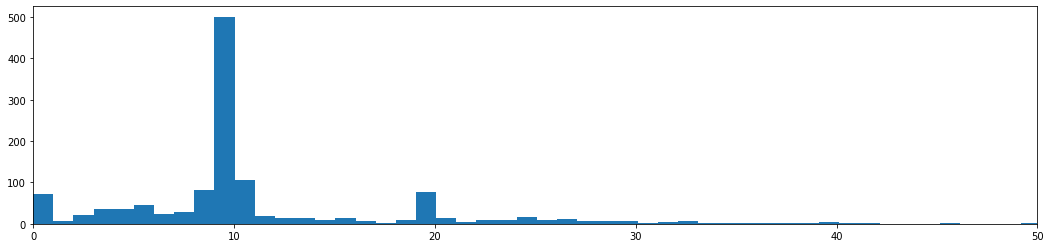

'4T'(967) -> 'T'(203) -> '2T'(62)
Max update time 1679


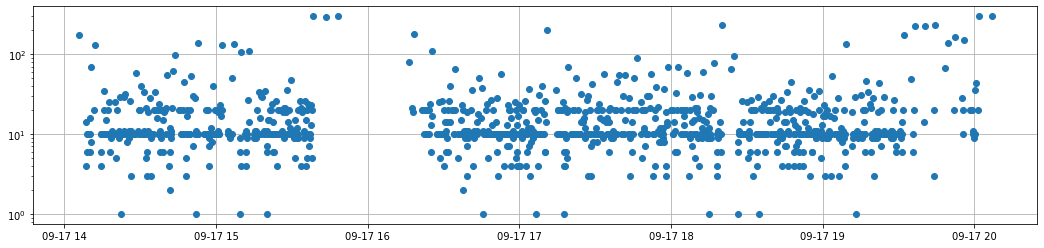

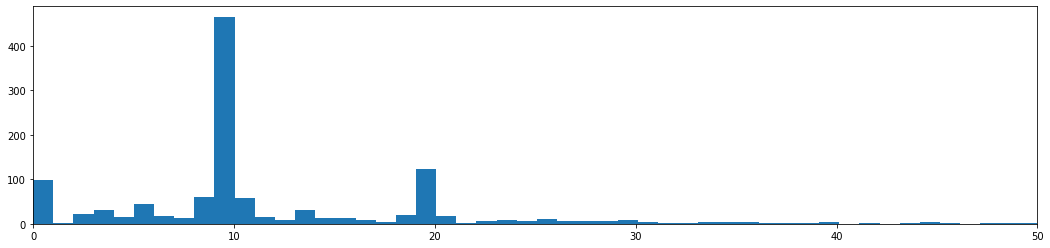

'T'(522) -> '3/3a'(516)
Max update time 21273


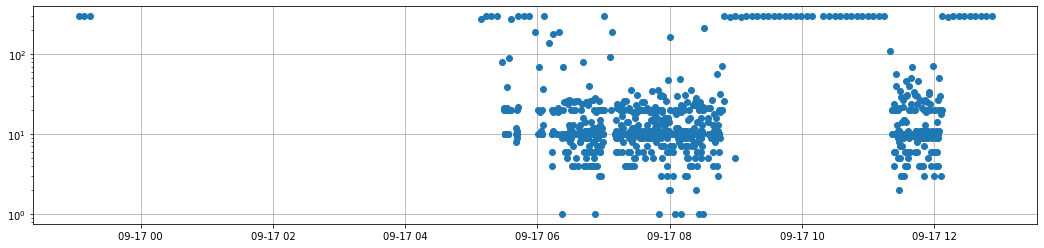

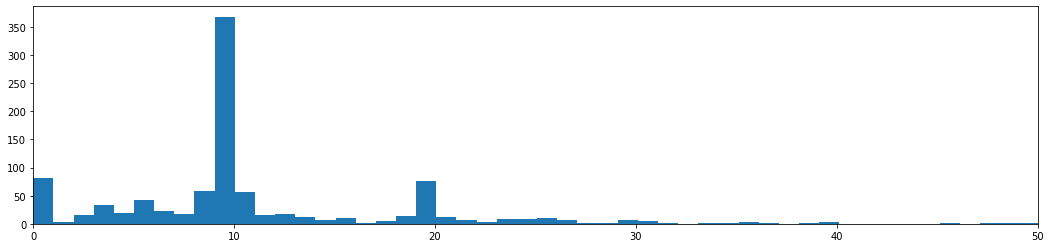

'20'(1033)
Max update time 3061


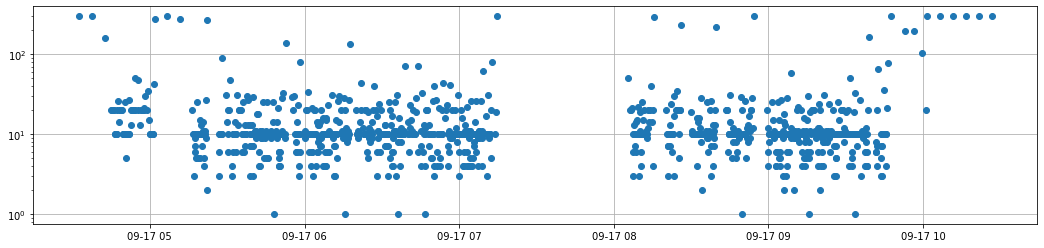

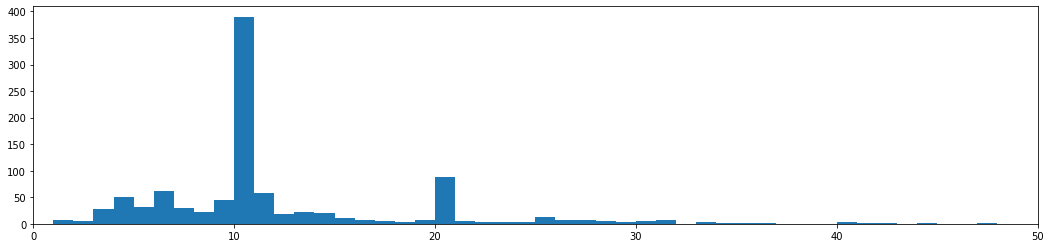

'A'(719)
Max update time 901


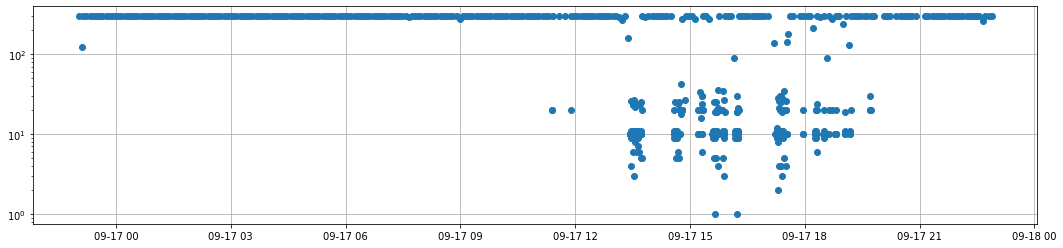

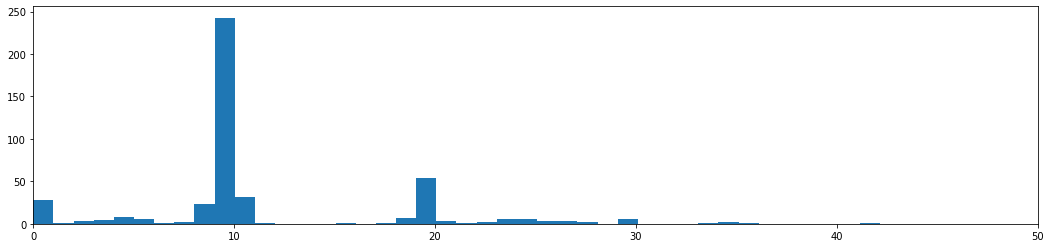

'19'(554)
Max update time 601


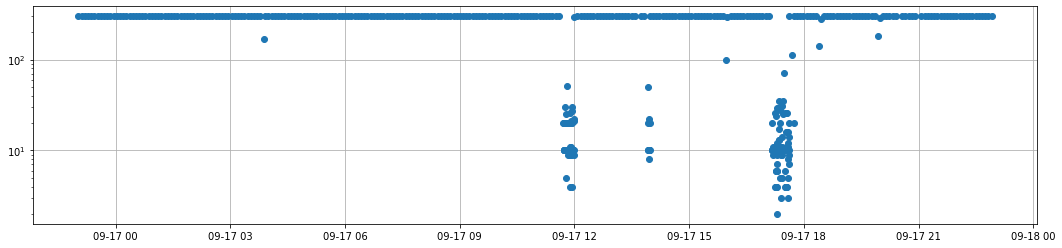

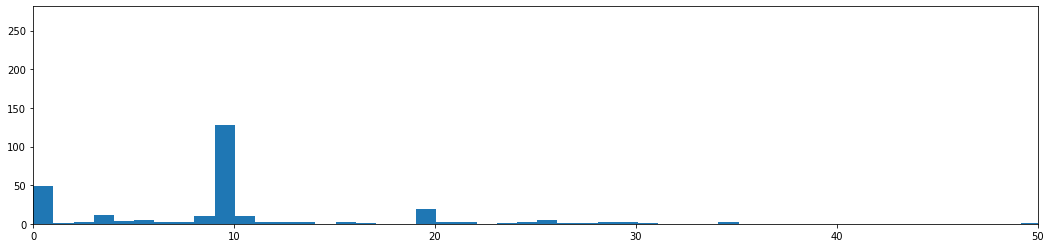

'11'(461)
Max update time 37011


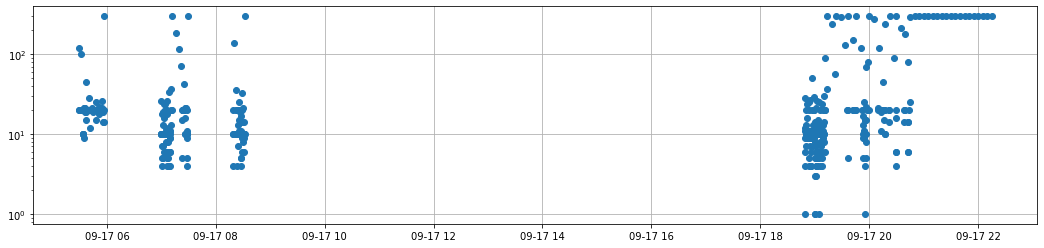

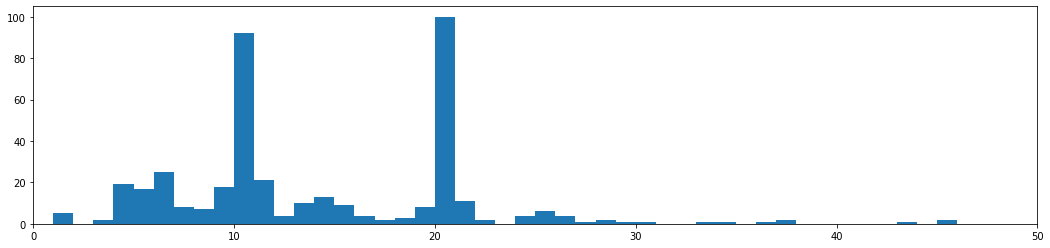

'A'(390)
Max update time 340


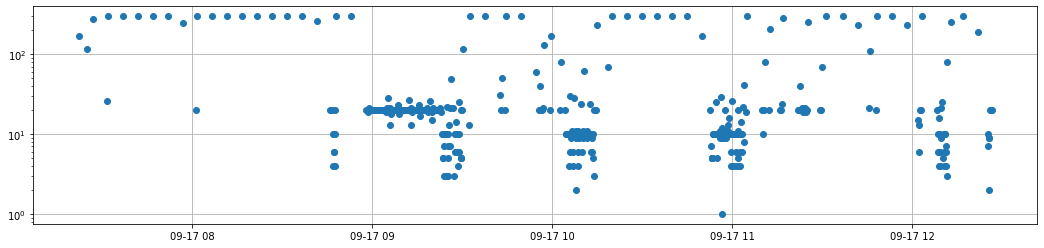

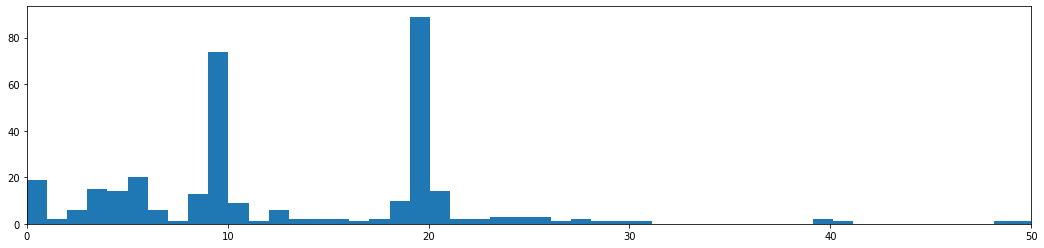

'9'(235) -> '39'(77)
Max update time 1644


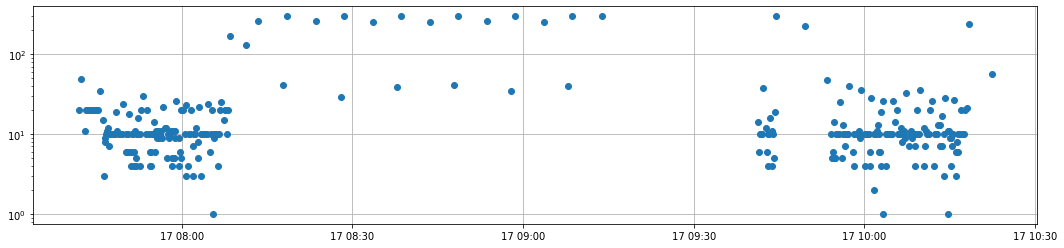

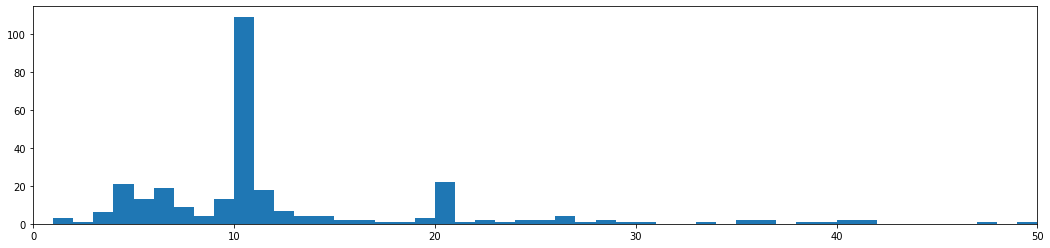

'T'(301)
Max update time 601


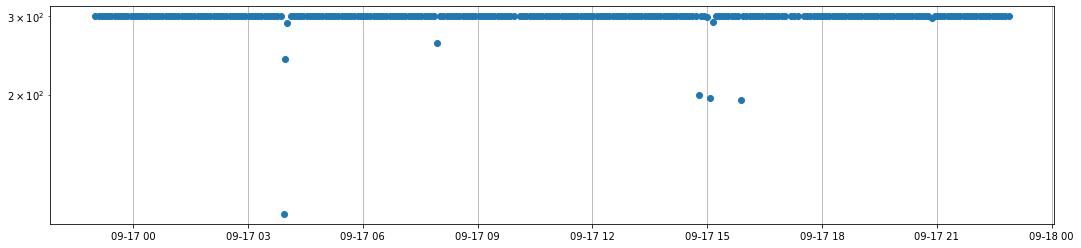

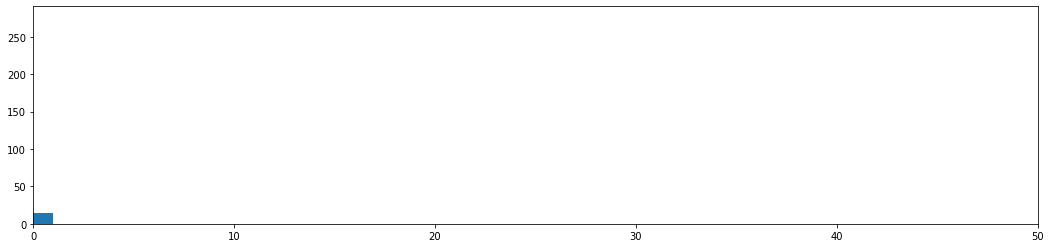

'38'(298)
Max update time 902


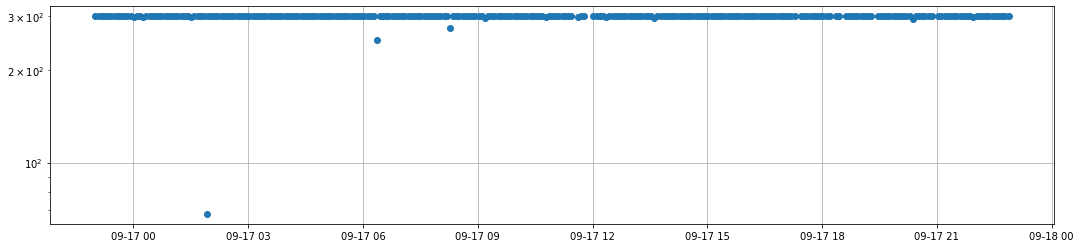

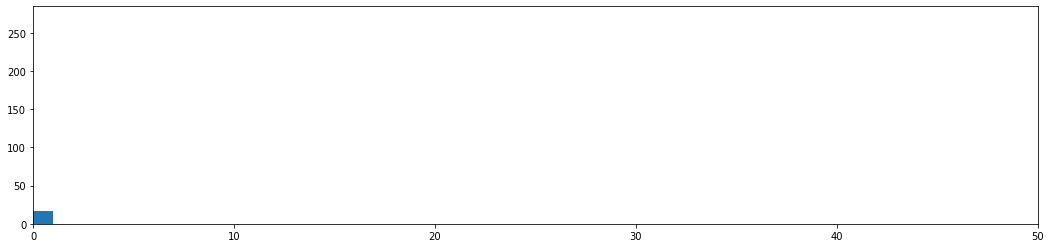

'11'(290)
Max update time 20641


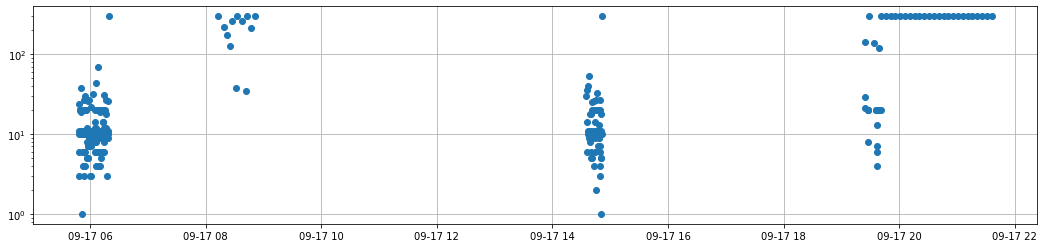

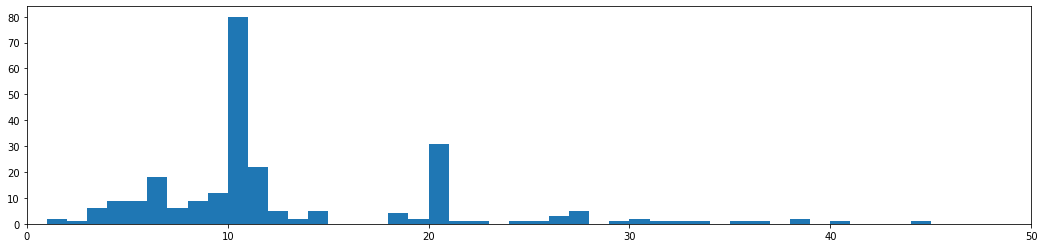

'9'(230)
Max update time 64


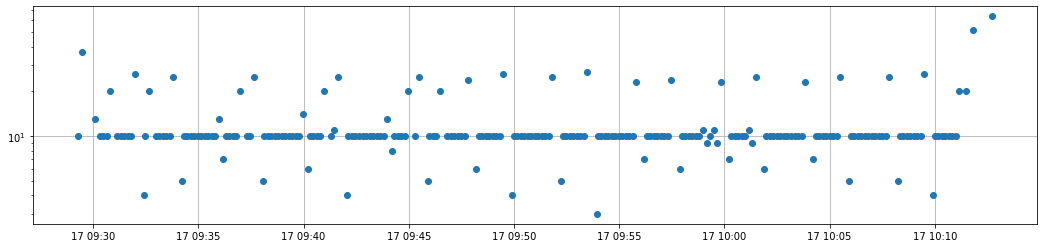

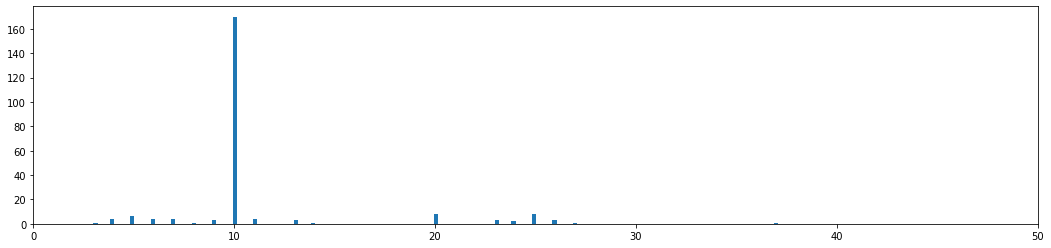

'A'(185)
Max update time 1587


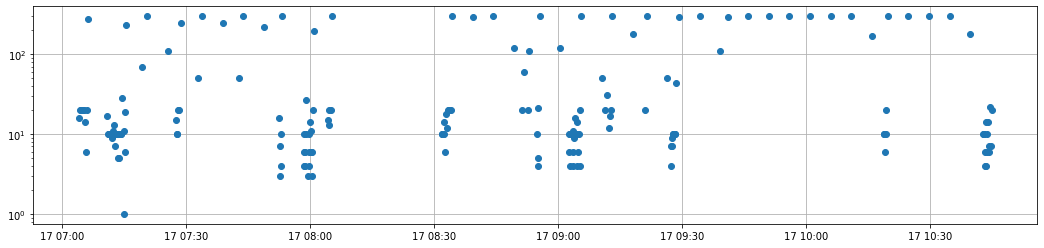

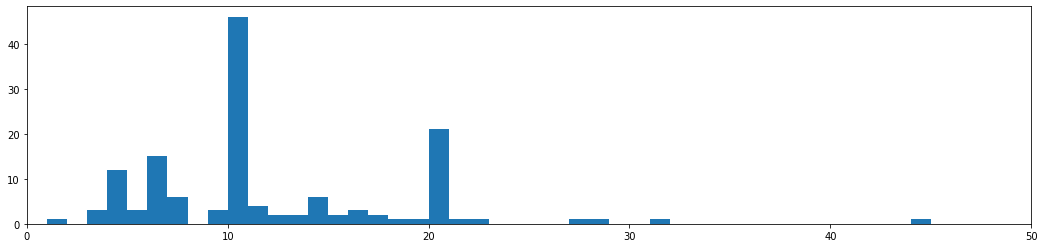

'A'(102)
Max update time 328


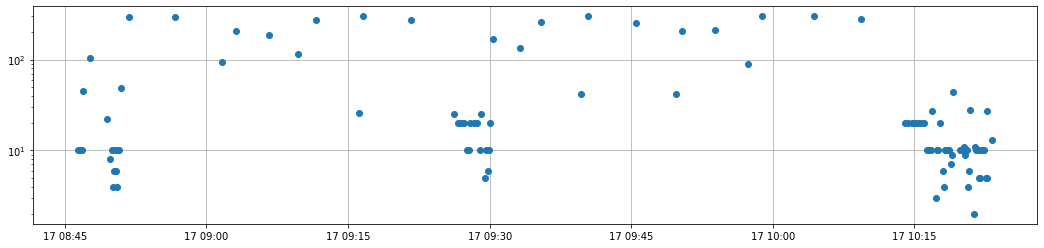

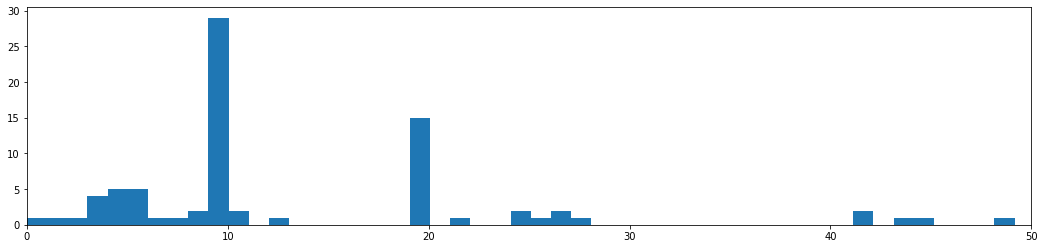

'1'(98)
Max update time 301


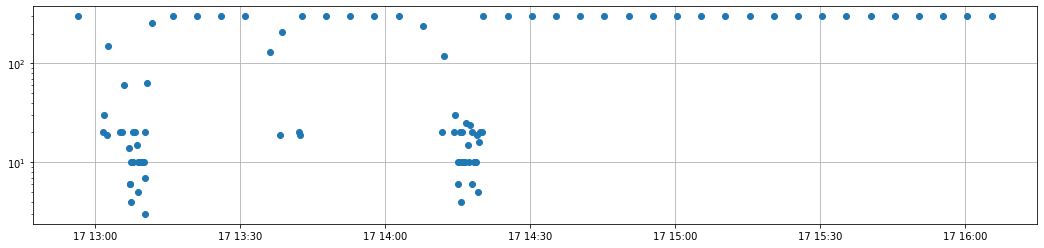

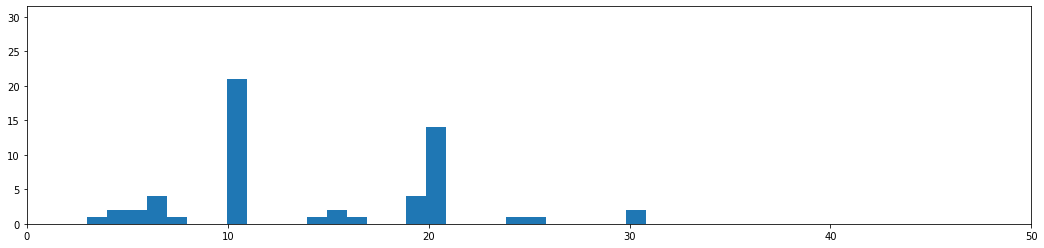

'34'(72) -> 'A'(2)
Max update time 46514


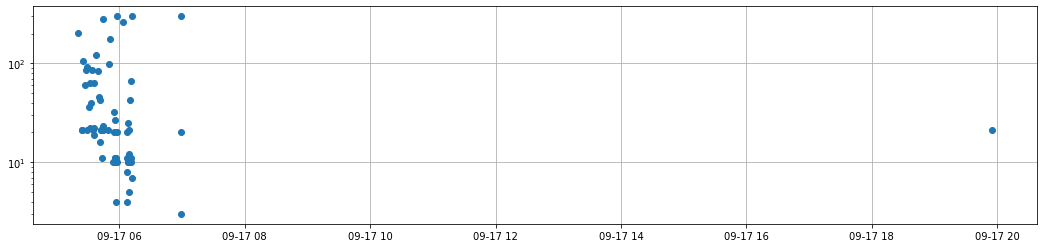

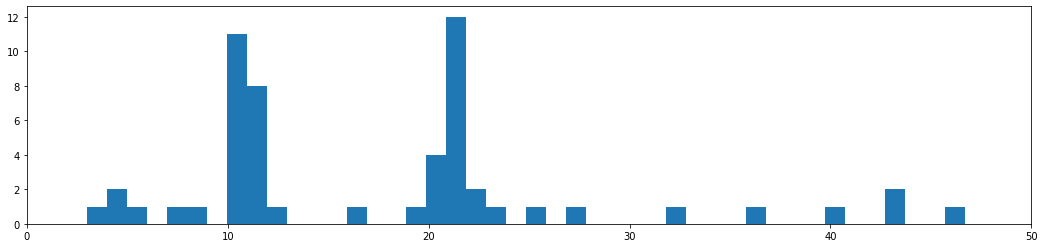

'6/6a'(45)
Max update time 6005


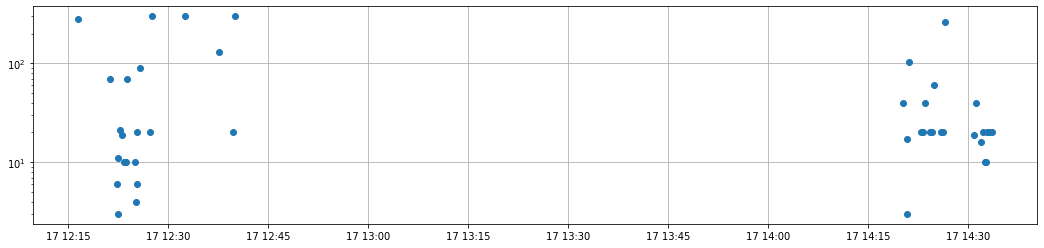

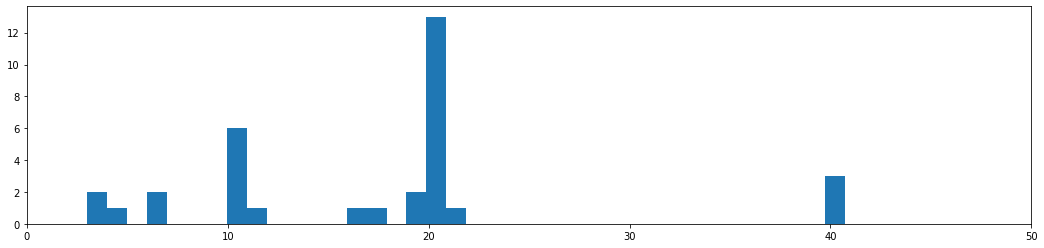

'6/6a'(45)
Max update time 29098


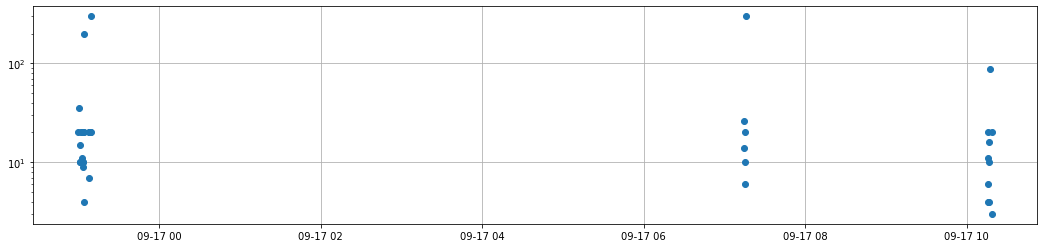

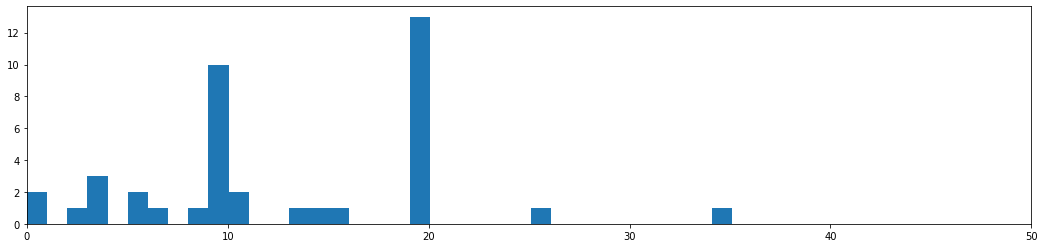

'38'(40)
Max update time 9165


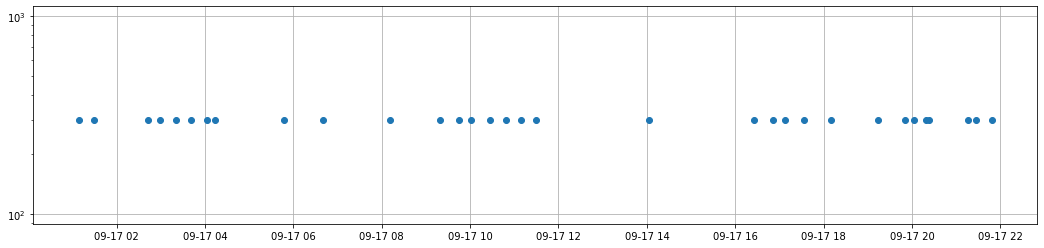

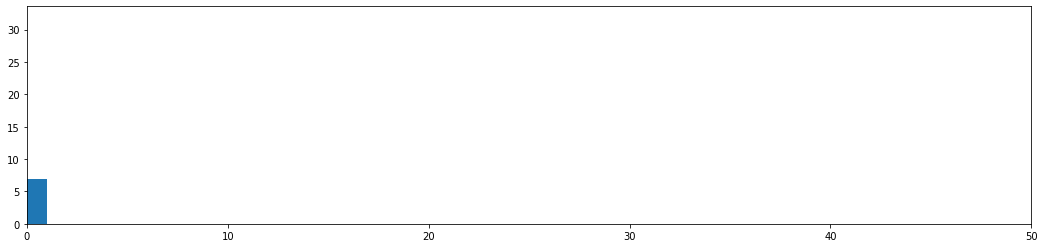

'39'(35)
Max update time 301


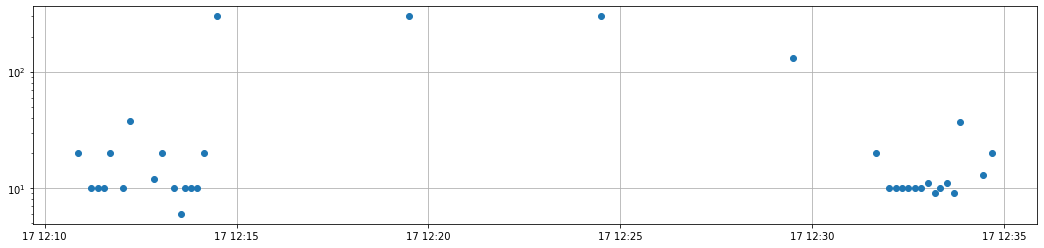

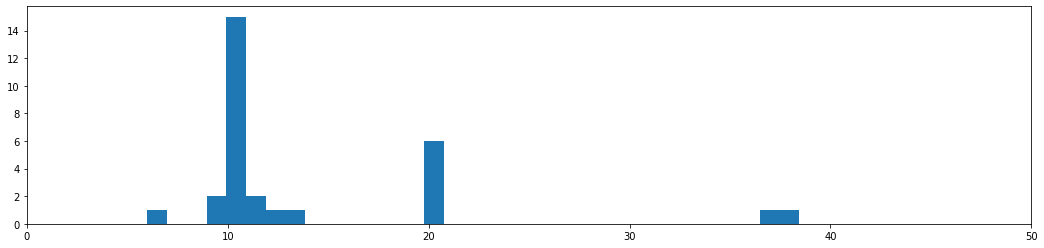

'1'(30)
Max update time 2555


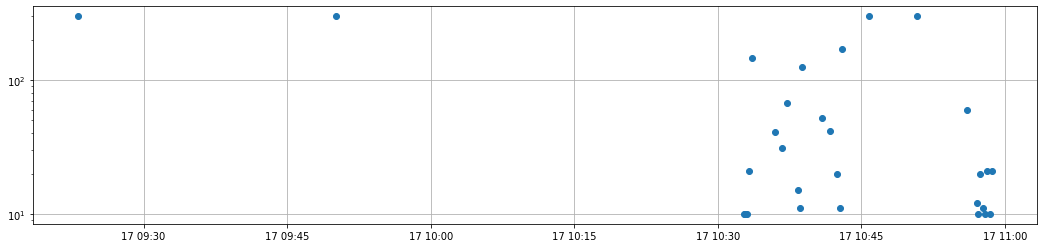

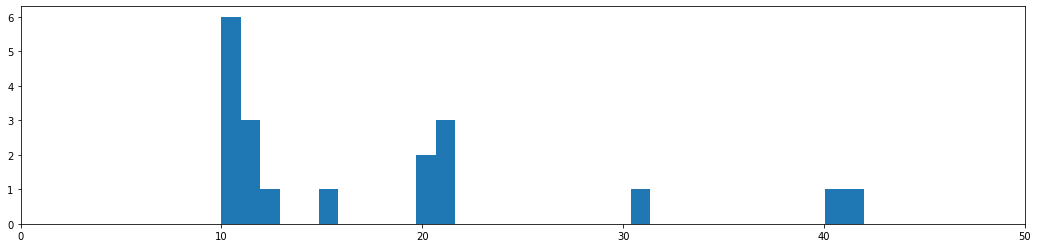

'5'(22)
Max update time 611


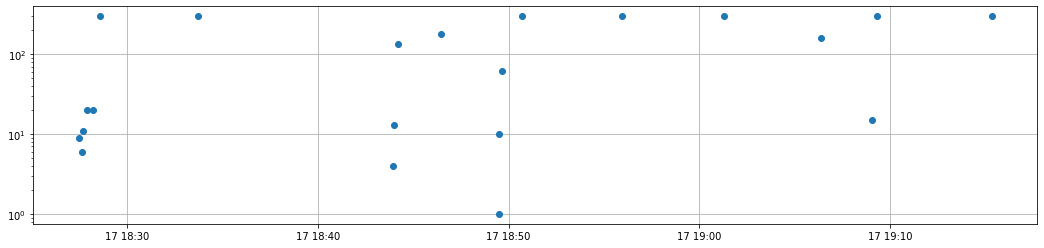

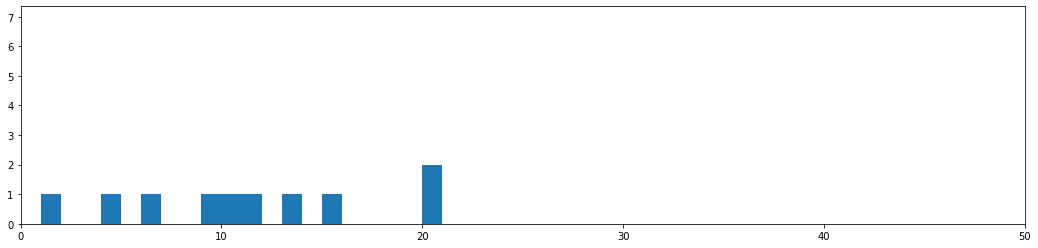

'29'(18)
Max update time 10823


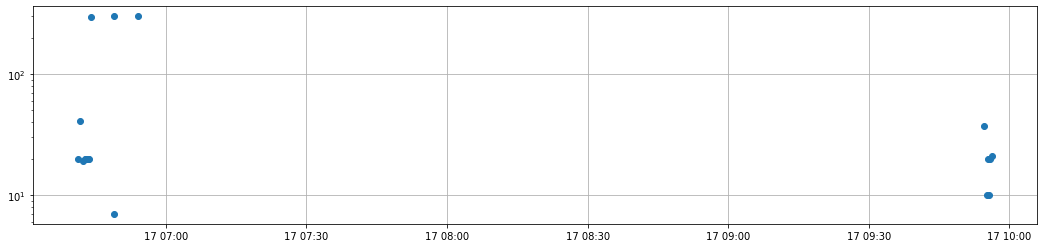

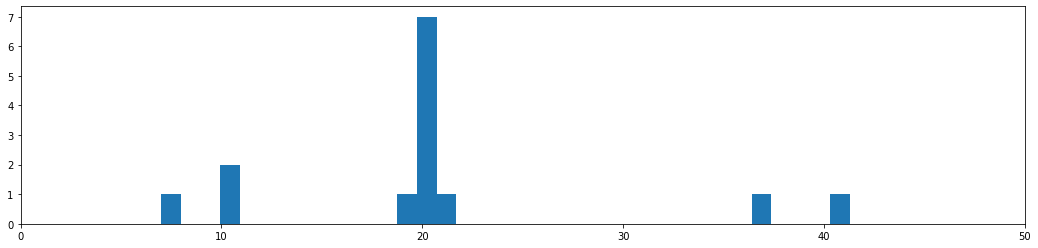

'A'(7)
Max update time 24


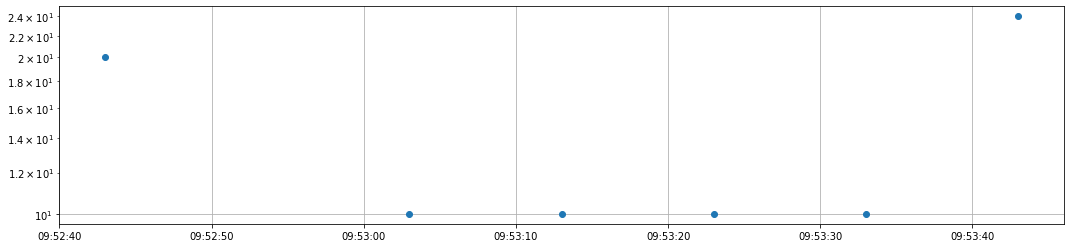

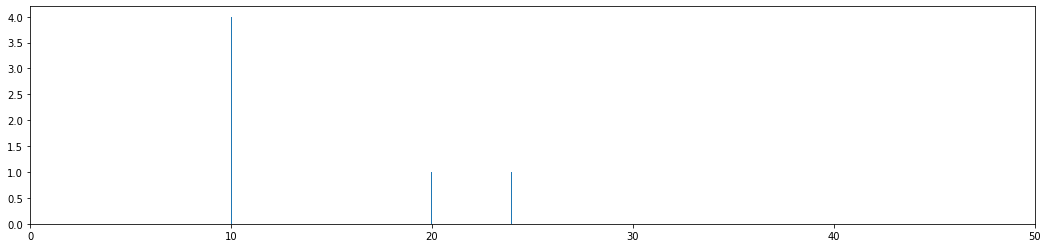

In [177]:
for imei, cnt in sum_df['imei'].value_counts().items():

    frame = sum_df[sum_df['imei'] == imei]
    dttm = frame['gpstime'].apply(lambda x : datetime.strptime(x, "%Y-%m-%d %H:%M:%S")).values
    dttm.sort()
    dttm_delta = (dttm[1:] - dttm[:-1] ).astype('timedelta64[s]').astype(int)
     
    dttm_delta_max = max(dttm_delta)
    dttm_delta[dttm_delta > 60*5] = 300
    
    print(" -> ".join([f"'{r}'({cnt})" for r, cnt in frame['routeName'].value_counts().items()]))
    print(f"Max update time {dttm_delta_max}")
    
    plt.figure(figsize=(18, 4))
    x_values = dttm[:-1]
    y_values = dttm_delta

    dates = matplotlib.dates.date2num(x_values)

    plt.plot_date(dates, y_values)
    plt.yscale("log")
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(18, 4))
    plt.hist(dttm_delta, bins=60*5-1)
    plt.xlim([0, 50])
    plt.show()
    
#     break


In [188]:
list(zip(dttm[:-1], dttm_delta))

[(numpy.datetime64('2022-09-17T09:52:43.000000000'), 20),
 (numpy.datetime64('2022-09-17T09:53:03.000000000'), 10),
 (numpy.datetime64('2022-09-17T09:53:13.000000000'), 10),
 (numpy.datetime64('2022-09-17T09:53:23.000000000'), 10),
 (numpy.datetime64('2022-09-17T09:53:33.000000000'), 10),
 (numpy.datetime64('2022-09-17T09:53:43.000000000'), 24)]

In [95]:
for imei, cnt in sum_df['imei'].value_counts().items():

    frame = sum_df[sum_df['imei'] == imei]
    
    print()

In [183]:
len(frame['gpstime'].unique())


7

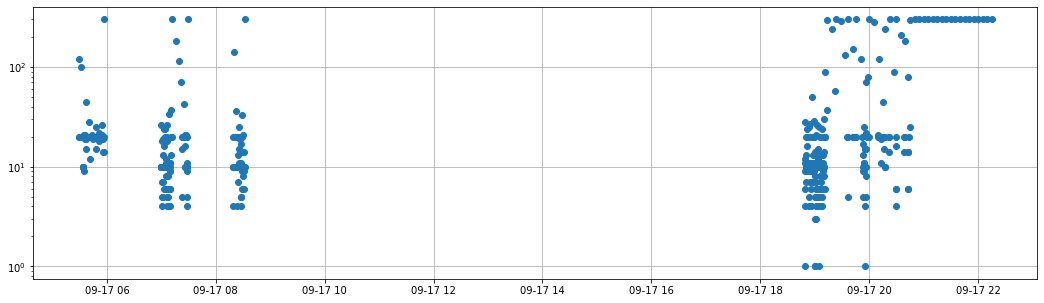

(0.0, 50.0)

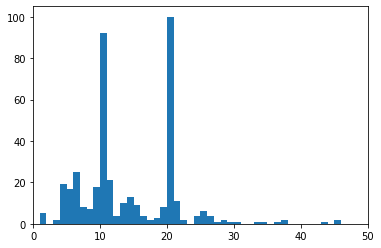

In [105]:
import matplotlib.dates

# from datetime import datetime
plt.figure(figsize=(18, 5))
x_values = dttm[:-1]
y_values = dttm_delta

dates = matplotlib.dates.date2num(x_values)

plt.plot_date(dates, y_values)
plt.yscale("log")
plt.grid()
plt.show()
plt.hist(dttm_delta.astype(int), bins=60*5-1)
plt.xlim([0, 50])

In [101]:
dttm_delta[dttm_delta > 60*5] = 300

In [81]:
dttm_delta

array([   20,    20,   120,    20,   100,    10,    10,    10,    10,
           9,    21,    20,    21,    19,    20,    21,    19,    45,
          15,    20,    20,    20,    20,    20,    20,    20,    20,
          20,    28,    12,    20,    20,    20,    20,    20,    20,
          20,    20,    21,    19,    20,    20,    20,    20,    20,
          20,    20,    20,    20,    25,    15,    20,    20,    20,
          20,    20,    20,    20,    20,    22,    18,    20,    21,
          19,    20,    20,    20,    20,    20,    21,    26,    14,
          19,    20,    20,    20,    14,  3737,    10,    10,    10,
          10,    26,     4,     5,    18,     7,    10,    10,    10,
          10,    10,    13,     7,     5,    19,    16,    24,     6,
          10,    10,    10,    10,    20,    24,     6,    10,    12,
           8,    10,    10,    11,    18,     5,     6,    26,     4,
          20,    10,    10,    10,    11,     5,     8,     6,     4,
          10,     6,

In [154]:
# vehicle_df

In [41]:
vehicle_df[['routeName', 'routeColour']].value_counts()

routeName  routeColour
11         green          461
dtype: int64

In [42]:
import matplotlib as mpl

cm = mpl.cm.get_cmap('jet')
# viridis = mpl.colormaps['viridis'].resampled(8)

In [47]:
trace = vehicle_df[['lat', 'lng']].values

m = folium.Map(
    location=np.mean(trace, axis=0), 
    zoom_start=12, height='50%', width='55%'
    )

plot_coloured_route(trace, m)

m

In [46]:
def rgb_to_hex(r, g, b):
    return f'{r:02x}{g:02x}{b:02x}'


def plot_coloured_route(route, folium_map, color_map=mpl.cm.get_cmap('jet'), bins=10):
    bins = min(bins, len(route))
    
    lspace = np.linspace(0, len(route), num=bins+1, dtype=int)
    
    for i, (lb, rb) in enumerate(zip(lspace[:-1], lspace[1:]) ):
        clr = rgb_to_hex(*tuple(map(lambda x : int(x*255), cm(i/bins) ))[:3])
        folium.PolyLine(
            route[lb:rb+1, :],
            color=f"#{clr}", weight=2,
            opacity=0.8
        ).add_to(folium_map)

In [16]:
# result_list

In [20]:
# df.value_counts()
'id', 'imei', 'name', 'stateCode', 'stateName', 'lat', 'lng', 'speed',
       'orientation', 'gpstime', 'routeId', 'routeName', 'routeColour',
       'inDepo', 'busNumber', 'perevId', 'perevName', 'remark', 'online',
       'idBusTypes'
df.keys()

Index(['id', 'imei', 'name', 'stateCode', 'stateName', 'lat', 'lng', 'speed',
       'orientation', 'gpstime', 'routeId', 'routeName', 'routeColour',
       'inDepo', 'busNumber', 'perevId', 'perevName', 'remark', 'online',
       'idBusTypes'],
      dtype='object')

In [29]:
# df['gpstime'].value_counts()
max(sum_df['gpstime']), min(sum_df['gpstime'])

('2022-09-09 22:59:57', '2022-09-08 19:36:01')

In [31]:
len(sum_df['gpstime'].unique()), len(sum_df['gpstime'])

(49461, 224505)

In [32]:
updata_tm = [datetime.strptime(dt, '%Y-%m-%d %H:%M:%S').timestamp() for dt in sum_df['gpstime'].unique() ]
updata_tm_np = np.array(updata_tm)

In [33]:
max(updata_tm_np[1:] - updata_tm_np[:-1])

15462.0

In [34]:
updata_tm_np[1:] - updata_tm_np[:-1]

array([ 1.1000e+01,  3.0000e+00,  7.0000e+00, ...,  7.0000e+00,
       -2.7304e+04,  1.1349e+04])

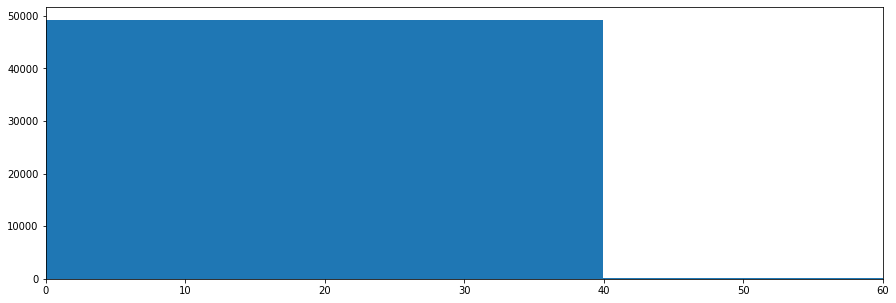

In [35]:
plt.figure(figsize=(15, 5))
plt.hist(updata_tm_np[1:] - updata_tm_np[:-1], bins=391)
plt.xlim(0, 60)
plt.show()

In [36]:
df.keys()

NameError: name 'df' is not defined

In [119]:
d = datetime.now()

In [121]:
d.microsecond > 1_000

343015

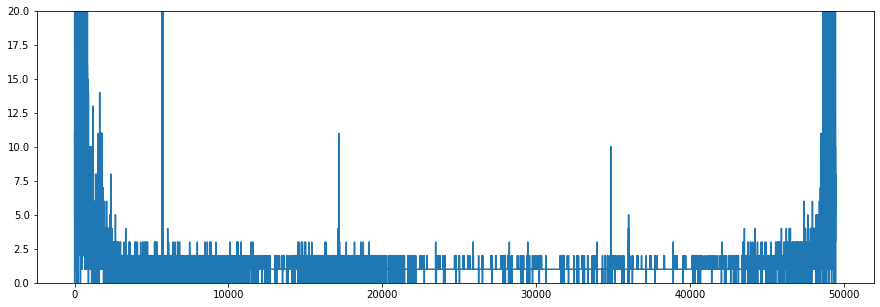

In [37]:
plt.figure(figsize=(15, 5))
plt.plot(updata_tm_np[1:] - updata_tm_np[:-1])
plt.ylim(0, 20)
plt.show()

In [38]:
np.histogram(updata_tm_np[1:] - updata_tm_np[:-1], bins=391)

(array([    1,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [ ]:
datetime.strftime('%Y-%m-%d %H;%M;%S')

In [54]:
datetime.strptime('2022-09-05 22:09:58', '%Y-%m-%d %H:%M:%S').timestamp()

1662404998.0

In [35]:
df.iloc[-1]

id                              75
imei               355227045369527
name                            A6
stateCode                     used
stateName                     used
lat                      48.326433
lng                      25.930175
speed                        000.0
orientation                 000.00
gpstime        2022-09-05 22:09:58
routeId                         17
routeName                       23
routeColour                    red
inDepo                       False
busNumber                     3557
perevId                         12
perevName              Vitaliy2019
remark                 3557 DNSNK 
online                        True
idBusTypes                       1
Name: 47737, dtype: object

In [109]:
# for f_path in files_list[:1]:
#     with open(f_path, 'r', encoding = 'utf-8') as file: 
#         response = json.load(file)
        
# for _ in range(5):
#     with open("test_mult_w.json", 'a') as out_f: 
#         json.dump(response, out_f, ensure_ascii=False)
#         out_f.write('\n')

In [41]:
for _ in range(5):
    with open("test_mult_w.json", 'a') as out_f: 
        json.dump(response, out_f, ensure_ascii=False)
        out_f.write('\n')